<h1>Содержание<span class="tocSkip"></span></h1>
<ul class="toc-item"><li><span><a href="#Изучение-данных-и-предварительная-обработка" data-toc-modified-id="Изучение-данных-и-предварительная-обработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных и предварительная обработка</a></span><ul class="toc-item"><li><span><a href="#Анализ-датасета-'data_arc'" data-toc-modified-id="Анализ-датасета-'data_arc'-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ датасета 'data_arc'</a></span></li><li><span><a href="#Анализ-датасета-'data_bulk'" data-toc-modified-id="Анализ-датасета-'data_bulk'-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ датасета 'data_bulk'</a></span></li><li><span><a href="#Анализ-датасета-'data_bulk_time'" data-toc-modified-id="Анализ-датасета-'data_bulk_time'-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ датасета 'data_bulk_time'</a></span></li><li><span><a href="#Анализ-датасета-'data_gas'" data-toc-modified-id="Анализ-датасета-'data_gas'-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ датасета 'data_gas'</a></span></li><li><span><a href="#Анализ-датасета-'data_temp'" data-toc-modified-id="Анализ-датасета-'data_temp'-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Анализ датасета 'data_temp'</a></span></li><li><span><a href="#Анализ-датасета-'data_wire'" data-toc-modified-id="Анализ-датасета-'data_wire'-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Анализ датасета 'data_wire'</a></span></li><li><span><a href="#Анализ-датасета-'data_wire_time'" data-toc-modified-id="Анализ-датасета-'data_wire_time'-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Анализ датасета 'data_wire_time'</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-и-подготовка" data-toc-modified-id="Исследовательский-анализ-данных-и-подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных и подготовка</a></span></li><li><span><a href="#Обучение-и-анализ-моделей" data-toc-modified-id="Обучение-и-анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и анализ моделей</a></span></li><li><span><a href="#Общий-отчет" data-toc-modified-id="Общий-отчет-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий отчет</a></span></li></ul>

# Предсказание температуры сырья для промышленного предприятия

<font color='DarkBlue'> 
📌 Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали. Требуется построить модель, которая предскажет температуру стали
</font> 

<font color='DarkBlue'> 
📌 <b> Описание этапа обработки </b>

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).
</font> 

<font color='DarkBlue'>
📌 <b> Описание данных </b>

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` — данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки
</font> 

## Изучение данных и предварительная обработка

In [1]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки numpy
import numpy as np
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# Импорт библиотеки math
import math
# Импорт библиотеки seaborn
import seaborn as sns
# Импорт библиотеки re
import re
# Импорт библиотеки time
import time
# Импорт библиотеки scipy
from scipy.stats import norm
import scipy.stats
# Импорт библиотеки sklearn и сопутствующих компонентов
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
# Удаление ложных предупреждений
pd.options.mode.chained_assignment = None  # default='warn'
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

<font color='DarkBlue'> 
📌 Импортированы все библиотеки, используемые в проекте, и скорректированы настройки <br>
</font> 

### Анализ датасета 'data_arc'

<font color='DarkBlue'> 
📌 Сначала необходимо загрузить и подготовить данные. Рекомендуется создать функцию для многократного выполнения соответствующих операций <br>
</font> 

In [2]:
def info(file_name):
    # Загрузка таблицы в память переменной df типа dataframe
    df = pd.read_csv('/datasets/final_steel/' + file_name)
    # Заголовки с разделителями для удобства отображения информации указаны в виде выделенных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
    print('\033[1m\033[43m {}'.format('----- Просмотр общей информации dataframe -----'),'\033[0m')
    print(df.info())
    print('\033[1m\033[43m {}'.format('----- Информация по заголовкам полей dataframe -----'),'\033[0m')
    print(df.columns)
    print('\033[1m\033[43m {}'.format('----- Отображение на экране первых записей dataframe -----'),'\033[0m')
    display(df.head())
    print('Количество явных дубликатов:', df.duplicated().sum())
    return df

<font color='DarkBlue'> 
📌 Нужно отобразить основные данные по первой таблице <br>
</font> 

In [3]:
df_arc = info('data_arc.csv')

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None
 ----- Информация по заголовкам полей dataframe ----- 
Index(['key', 'Начало нагрева дугой', 'Конец нагрева дугой',
       'Активная мощность', 'Реактивная мощность'],
      dtype='object')
 ----- Отображение на экране первых записей dataframe ----- 


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Количество явных дубликатов: 0


<font color='DarkBlue'>
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
- на данный момент отсутствует необходимость в редактировании заголовков, данные будут агрегированы, названия представлены в удобном для чтения формате, но не в условно общепринятом 'Змеиный регистр';
- отсутствуют явные дубликаты и, соответственно, необходимость удаления повторяющихся объектов;
- тип данных числовых полей после всех манипуляций по подготовке к использованию в моделях рекомендуется преобразовать для уменьшения требуемого объема памяти хранения данных, также необходимо конвертировать время в соответствующий тип;
- пропуски в столбцах не обнаружены;
- в исходных данных возможно проявление некорректных значений, рекомендуется детальный анализ параметров полей и визуализация гистограмм распределения их значений;
- единицы измерения всех величин не известны, но для построения модели важно только их отношение между объектами
</font> 

In [4]:
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


<font color='DarkBlue'>
📌 Необходимо удостовериться в том, что все итерации технологического процесса в таблице по каждой партии заготовок, обозначенной идентификатором key, указаны в верной последовательности, так как в дальнейшем возможно будет присутствовать необходимость выделять первые или последние элементы и строить графики изменения технологических параметров по времени. При необходимости потребуется упорядочить данные <br>
📌 Возможно данные отсортированы по началу или окончанию исследуемых процессов <br>
</font> 

In [5]:
count_begin = 0
count_end = 0
for i in df_arc['key'].unique():
    if not df_arc[df_arc['key'] == i]['Начало нагрева дугой'].is_monotonic:
        count_begin += 1
    if not df_arc[df_arc['key'] == i]['Конец нагрева дугой'].is_monotonic:
        count_end += 1    
print('Количество элементов технологического процесса с нарушенной последовательностью в датасете по полю \'Начало нагрева дугой\':', count_begin)
print('Количество элементов технологического процесса с нарушенной последовательностью в датасете по полю \'Конец нагрева дугой\':', count_end)

Количество элементов технологического процесса с нарушенной последовательностью в датасете по полю 'Начало нагрева дугой': 0
Количество элементов технологического процесса с нарушенной последовательностью в датасете по полю 'Конец нагрева дугой': 0


In [6]:
print('Отсутствие нарушения последовательности расположения партий в датасете по полю \'Начало нагрева дугой\':', df_arc.groupby('key')['Начало нагрева дугой'].first().is_monotonic)
print('Отсутствие нарушения последовательности расположения партий в датасете по полю \'Конец нагрева дугой\':', df_arc.groupby('key')['Конец нагрева дугой'].last().is_monotonic)

Отсутствие нарушения последовательности расположения партий в датасете по полю 'Начало нагрева дугой': False
Отсутствие нарушения последовательности расположения партий в датасете по полю 'Конец нагрева дугой': False


<font color='DarkBlue'>
📌 Присутствует нарушенная последовательность расположения партий в датасете. Можно определить их количество. Этот фактор в дальнейшем на расчеты не повлияет, поэтому отсутствует необходимость сортировки или переименования идентификаторов партий. Задача не предполагает взаимодействие с алгоритмами обработки временных рядов, промежутки между всеми замерами различны <br> 
</font> 

In [7]:
print(df_arc.groupby('key')['Начало нагрева дугой'].first().head())
print(df_arc.groupby('key')['Конец нагрева дугой'].last().head())

key
1   2019-05-03 11:02:14
2   2019-05-03 11:34:14
3   2019-05-03 12:06:54
4   2019-05-03 12:39:37
5   2019-05-03 13:11:13
Name: Начало нагрева дугой, dtype: datetime64[ns]
key
1   2019-05-03 11:28:37
2   2019-05-03 11:53:18
3   2019-05-03 12:32:19
4   2019-05-03 12:57:50
5   2019-05-03 13:33:55
Name: Конец нагрева дугой, dtype: datetime64[ns]


In [8]:
print('Количество пар партий с нарушенной последовательностью по полю \'Начало нагрева дугой\':', (((df_arc.groupby('key')['Начало нагрева дугой'].first() - df_arc.groupby('key')['Начало нагрева дугой'].first().shift(1)).dt.total_seconds()) < 0).sum())
print('Количество пар партий с нарушенной последовательностью по полю \'Конец нагрева дугой\':', (((df_arc.groupby('key')['Конец нагрева дугой'].last() - df_arc.groupby('key')['Конец нагрева дугой'].last().shift(1)).dt.total_seconds()) < 0).sum())

Количество пар партий с нарушенной последовательностью по полю 'Начало нагрева дугой': 20
Количество пар партий с нарушенной последовательностью по полю 'Конец нагрева дугой': 38


<font color='DarkBlue'> 
📌 Дополнительно можно проверить таблицу на наличие дубликатов по каждому из значащих полей <br> 
</font> 

In [9]:
print('Количество дубликатов поля \'Начало нагрева дугой\':', df_arc['Начало нагрева дугой'].duplicated().sum())
print('Количество дубликатов \'Конец нагрева дугой\':', df_arc['Конец нагрева дугой'].duplicated().sum())

Количество дубликатов поля 'Начало нагрева дугой': 1
Количество дубликатов 'Конец нагрева дугой': 0


<font color='DarkBlue'>
📌 Также можно подробнее рассмотреть подобные объекты и идентификаторы партий в целом, к которым они принадлежат <br> 
</font> 

In [10]:
df_arc[df_arc['Начало нагрева дугой'].duplicated(keep=False)]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
4872,1051,2019-06-10 22:02:03,2019-06-10 22:06:02,1.040376,0.635608
4876,1052,2019-06-10 22:02:03,2019-06-10 22:04:31,0.623495,0.508767


In [11]:
df_arc[(df_arc['key'] >= 1051) & (df_arc['key'] <= 1052)]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
4866,1051,2019-06-10 21:10:52,2019-06-10 21:16:30,1.448011,1.045037
4867,1051,2019-06-10 21:17:31,2019-06-10 21:24:27,2.003559,1.248206
4868,1051,2019-06-10 21:25:37,2019-06-10 21:30:51,1.528554,0.892720
4869,1051,2019-06-10 21:32:03,2019-06-10 21:36:58,1.417861,0.818525
4870,1051,2019-06-10 21:53:30,2019-06-10 21:54:50,0.337850,0.198380
4871,1051,2019-06-10 21:55:47,2019-06-10 22:00:57,1.352988,0.823782
4872,1051,2019-06-10 22:02:03,2019-06-10 22:06:02,1.040376,0.635608
4873,1052,2019-06-10 21:46:15,2019-06-10 21:52:20,1.292979,1.094674
4874,1052,2019-06-10 21:53:58,2019-06-10 21:58:07,1.098052,0.737462
4875,1052,2019-06-10 21:59:46,2019-06-10 22:00:20,0.134783,0.092384


<font color='DarkBlue'>
📌 Некоторые партии проходят обработку в одно время, но в большинстве они отсортированы в таблице по времени начала нагрева дугой <br> 
📌 Желательно создать функцию для получения подробной информации по каждому из рассматриваемых далее датасетов: выделения основных статистик и построения гистограмм распределения значений по каждому полю <br> 
</font> 

In [12]:
def details(df):
    display(df.describe(datetime_is_numeric=True))
    try:
        display(df.describe(include = ['object','bool']))
        for i in df.select_dtypes(include=['object','bool']):
            print('-----')
            if df[i].count() != len(df[i].unique()):
                print(df[i].value_counts())
            else:
                print('Все значения уникальны')
    except:
        print('Все данные представлены в количественном формате')
    print('-----')
    for i in df: 
        # time.sleep(1)
        if (len(df[i].dropna().unique()) > 1) & (not ((df[i].dtype == 'object') & (len(df[i].unique()) > 100))):
            print(i)
            if (len(df[i].unique()) < 100):
                if df[i].dtype == 'object':
                    df[i].hist(bins=np.linspace(- 0.5, len(df[i].unique()) - 0.5, num=len(df[i].unique()) + 1), figsize=(15,5)) 
                elif df[i].dtype == 'datetime64[ns]':
                    diff = (df[i].drop_duplicates().sort_values() - df[i].drop_duplicates().sort_values().shift(1))[(df[i].drop_duplicates().sort_values() - df[i].drop_duplicates().sort_values().shift(1)) > (df[i].max() - df[i].min())/1000].min().total_seconds()
                    df[i].hist(bins=round((df[i].max().timestamp() - df[i].min().timestamp() + diff)/diff), range=[df[i].min() - pd.Timedelta(seconds=0.5 * diff), df[i].max() + pd.Timedelta(seconds=0.5 * diff)], figsize=(15,5))
                else:
                    diff = (df[i].drop_duplicates().sort_values() - df[i].drop_duplicates().sort_values().shift(1))[(df[i].drop_duplicates().sort_values() - df[i].drop_duplicates().sort_values().shift(1)) > (df[i].max() - df[i].min())/1000].min()
                    df[i].hist(bins=np.linspace(df[i].min() - 0.5 * diff, df[i].max() + 0.5 * diff, num=round((df[i].max() - df[i].min() + 2 * diff)/diff)), figsize=(15,5))
                if (len(df[i].unique()) > 10):
                    plt.xticks(rotation=90)  
                plt.show() 
            else:        
                df[i].hist(bins=100, range=[df[i].min(), df[i].max()], figsize=(15,5))
                plt.show()

<font color='DarkBlue'>
📌 Теперь можно отобразить подробную информацию по первой таблице <br> 
</font> 

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
count,14876.000000,14876,14876,14876.000000,14876.000000
mean,1615.220422,2019-07-02 16:15:28.218203904,2019-07-02 16:18:19.889150208,0.670441,0.452592
min,1.000000,2019-05-03 11:02:14,2019-05-03 11:06:02,0.030002,-715.504924
25%,806.000000,2019-06-02 07:01:09.249999872,2019-06-02 07:04:21,0.395297,0.290991
50%,1617.000000,2019-06-30 09:57:14.500000,2019-06-30 10:01:01,0.555517,0.415962
75%,2429.000000,2019-08-03 13:04:47.750000128,2019-08-03 13:09:14,0.857034,0.637371
max,3241.000000,2019-09-01 04:34:47,2019-09-01 04:36:08,3.731596,2.676388
std,934.571502,NaN,NaN,0.408159,5.878702


Все данные представлены в количественном формате
-----
key


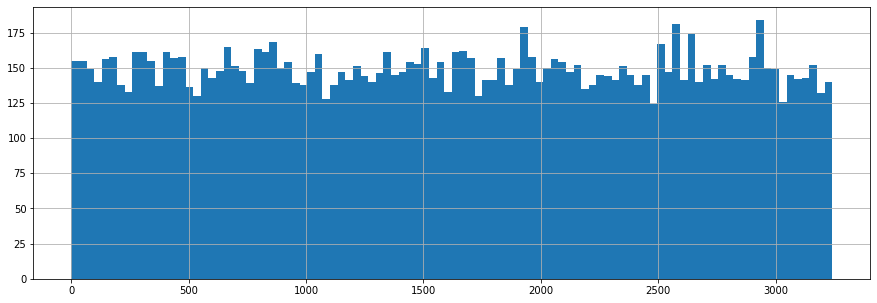

Начало нагрева дугой


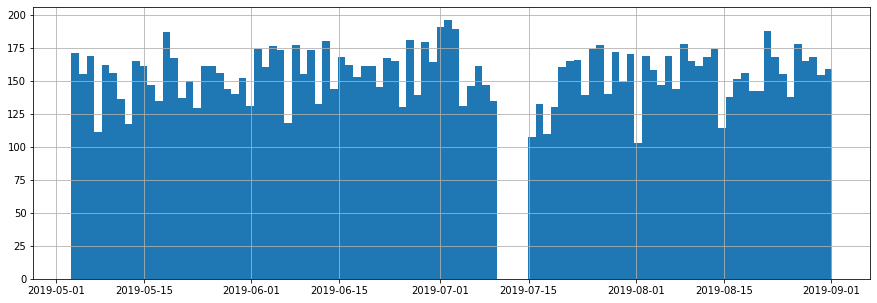

Конец нагрева дугой


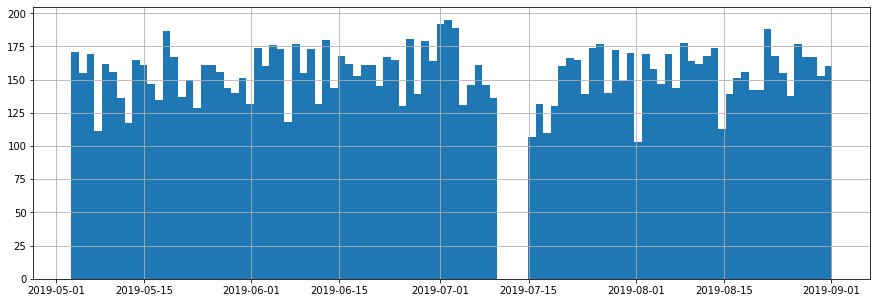

Активная мощность


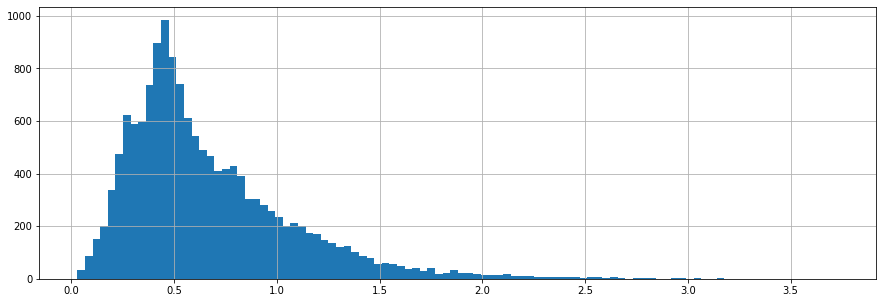

Реактивная мощность


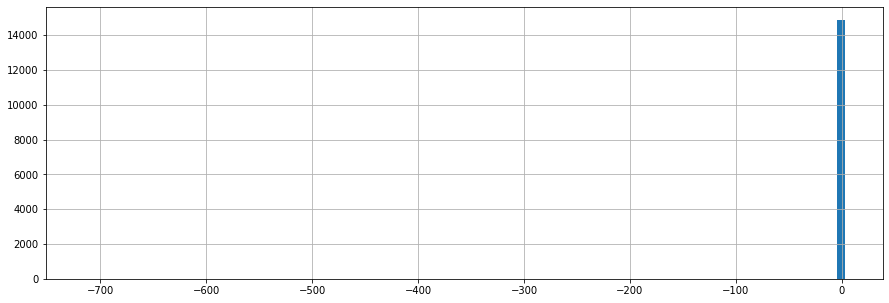

In [13]:
details(df_arc)

<font color='DarkBlue'> 
📌 По текущей информации можно сделать следующие выводы: 
 
- идентификаторы распределены равномерно на всем диапазоне доступных значений, в текущем контексте признак не является значащим для обучения моделей;
- присутствуют пропуски в середине указанного временного интервала длительности технологических процессов. Скорее наблюдался простой установки (возможные причины - технологические (техобслуживание, авария, ремонт) или бизнесовые (банкротство, перепродажа, релокация));  
- график активной мощности скошен в правую сторону, явно аномальные значения не наблюдаются;
- график реактивной неинформативен, высока вероятность наличия аномальных значений - менее 0, так как в текущем контексте задачи данный параметр может принимать только положительные значения
</font>    

In [14]:
df_arc[df_arc['Реактивная мощность'] < 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


<font color='DarkBlue'> 
📌 Теперь необходимо удалить все данные о партии, имеющей аномальное значение мощности, так как присутствует необходимость в наличии данного признака по каждой записи для вычисления агрегированного значения и использования его в моделях <br>
📌 Нужно построить гистограмму после удаления выбросов <br>    
</font>    

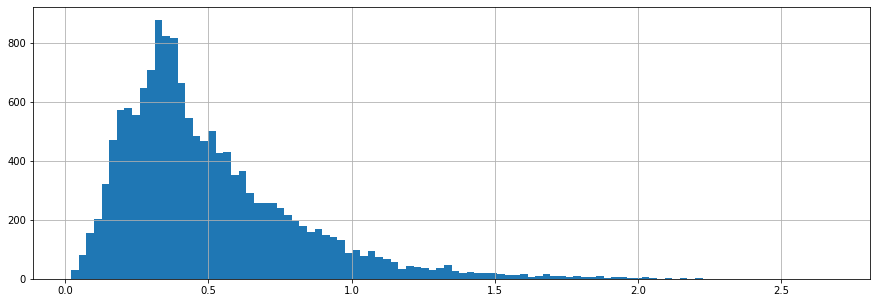

In [15]:
df_arc = df_arc[df_arc['key'] != int(df_arc.loc[df_arc['Реактивная мощность'] < 0, 'key'])].reset_index(drop=True)
df_arc['Реактивная мощность'].hist(bins=100, range=[df_arc['Реактивная мощность'].min(), df_arc['Реактивная мощность'].max()], figsize=(15,5))
plt.show()

<font color='DarkBlue'> 
📌 Требуется определить взаимосвязь параметров, определить возможную мультиколлинеарность. Распределение всех основных исходных в задаче данных, которые требуют проверку на мультиколлинеарность, нормальное, можно использовать коэффициент Пирсона для визуализации корреляции <br>
</font>    

,key,Активная мощность,Реактивная мощность
key,1.000000,-0.021311,-0.000091
Активная мощность,-0.021311,1.000000,0.963180
Реактивная мощность,-0.000091,0.963180,1.000000


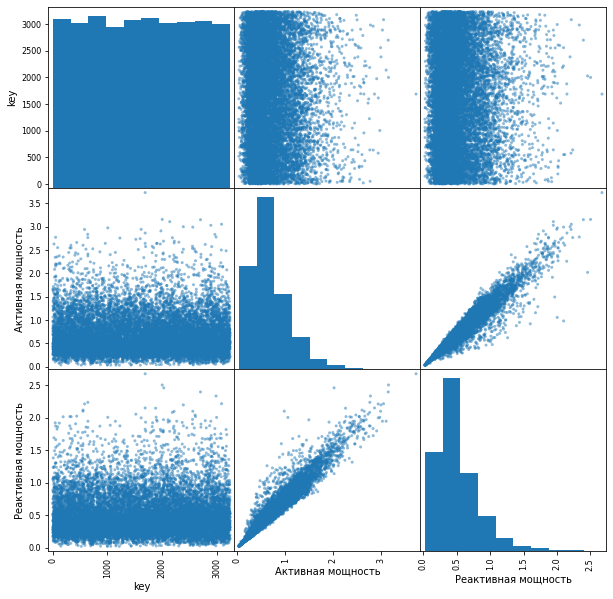

In [16]:
pd.plotting.scatter_matrix(df_arc, figsize=(10,10))
display(df_arc.select_dtypes(include=['bool','int','float']).corr())

<font color='DarkBlue'> 
📌 Наблюдается значительная взаимосвязь между значениями активной и реактивной мощностей. Соответственно, их одновременное наличие в финальных датасетах для работы с моделями будет лишним, необходимо удалить один признак или преобразовать их в единый <br>
</font>

### Анализ датасета 'data_bulk'

<font color='DarkBlue'> 
📌 Следом требуется отобразить основные данные по второй таблице <br>
</font> 

In [17]:
df_bulk = info('data_bulk.csv')

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None
 ----- Информация по заголовкам полей dataframe ----- 
Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'B

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Количество явных дубликатов: 0


<font color='DarkBlue'>
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
- присутствует необходимость в редактировании заголовков, названия не представлены в условно общепринятом 'Змеиный регистр';
- отсутствуют явные дубликаты и, соответственно, необходимость удаления повторяющихся объектов;
- необходимость конвертации типов данных на текущем этапе отсутствует;
- присутствуют пропуски в столбцах, необходимо определить их первопричину и при необходимости заполнить;
- в исходных данных возможно наличие некорректных значений, требуется детальный анализ по параметрам каждого поля
</font> 

In [18]:
col = []
for i in range(len(df_bulk.columns)):
    # col.append(re.sub(r'(?<!^)(?=[A-Z])', '_', df_bulk.columns[i]).lower())
    col.append(df_bulk.columns[i].replace(' ', '_').lower())
df_bulk.columns = col
display(df_bulk.head())

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


<font color='DarkBlue'>
📌 После редактирования заголовков необходимо отобразить подробную информацию по текущей таблице <br> 
</font> 

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Все данные представлены в количественном формате
-----
key


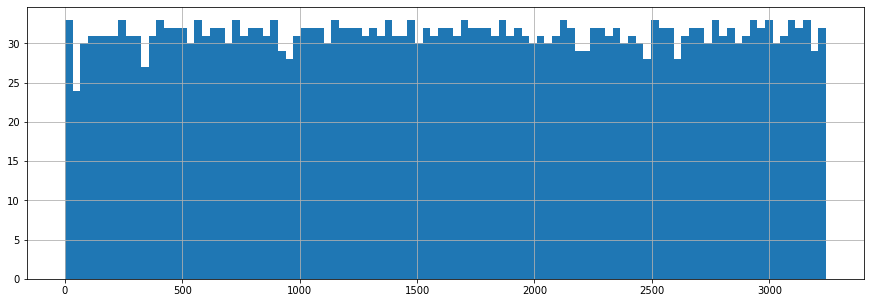

bulk_1


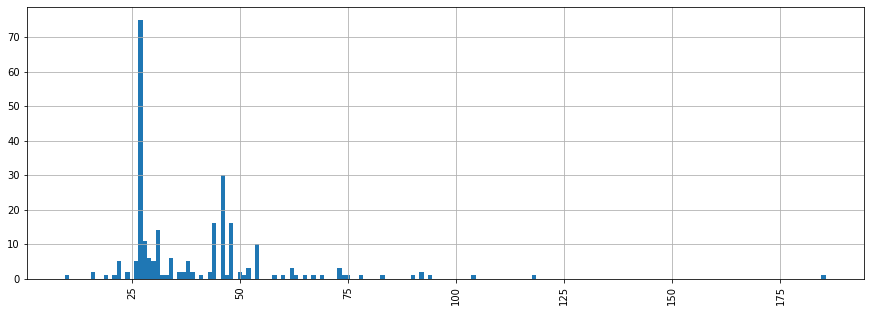

bulk_2


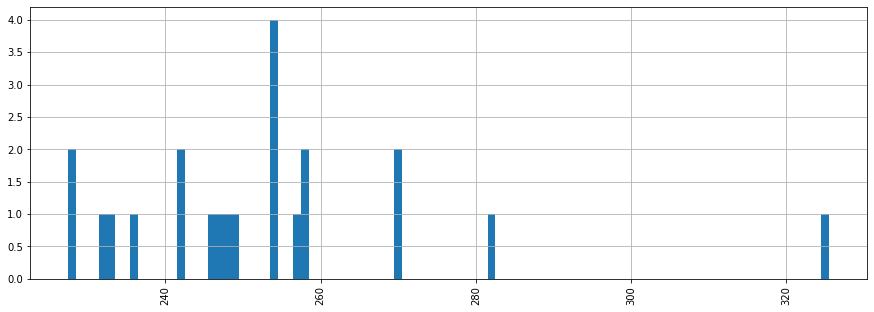

bulk_3


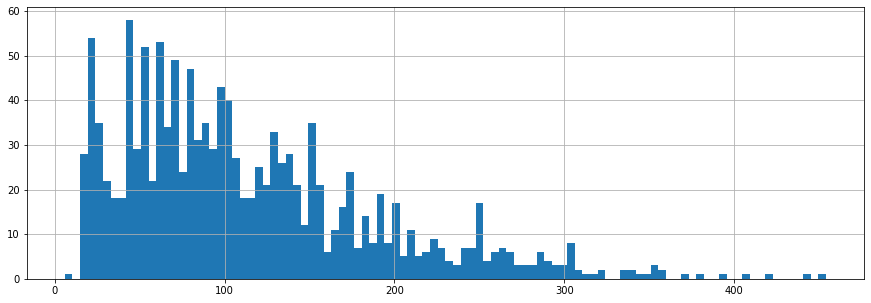

bulk_4


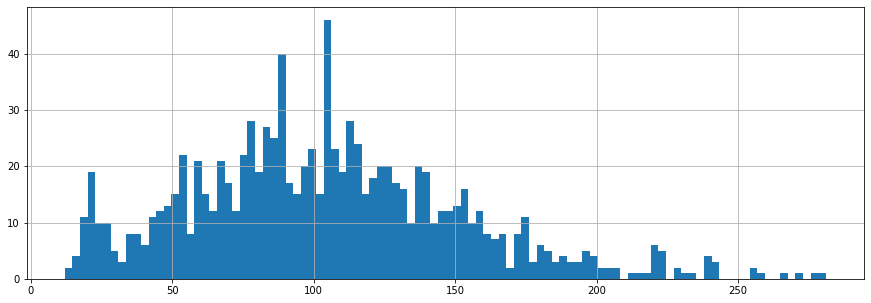

bulk_5


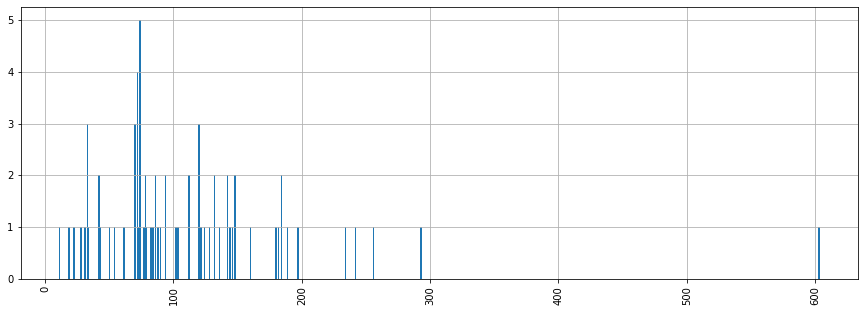

bulk_6


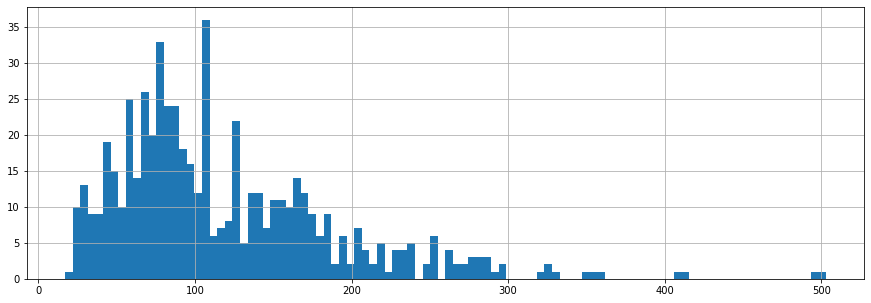

bulk_7


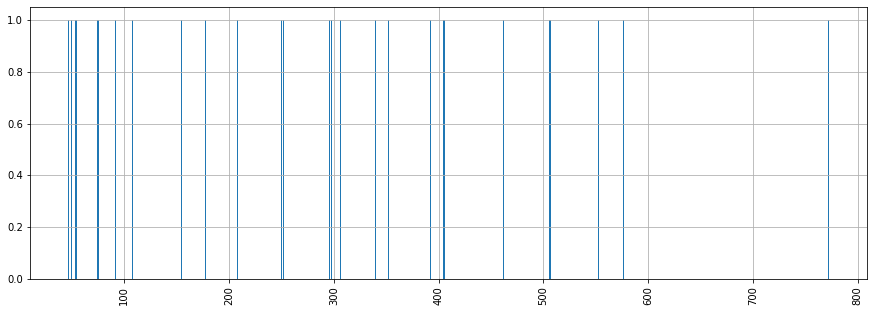

bulk_9


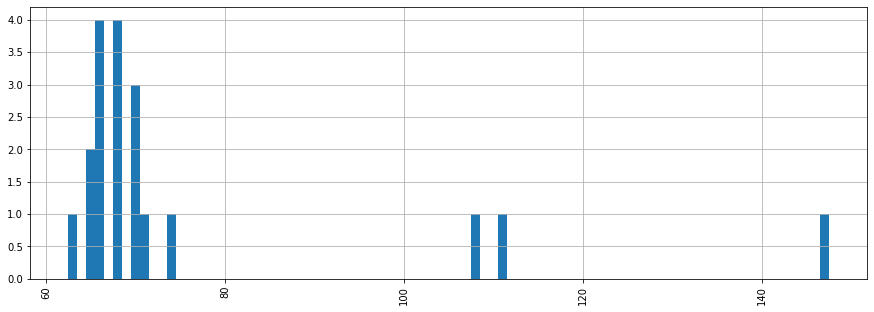

bulk_10


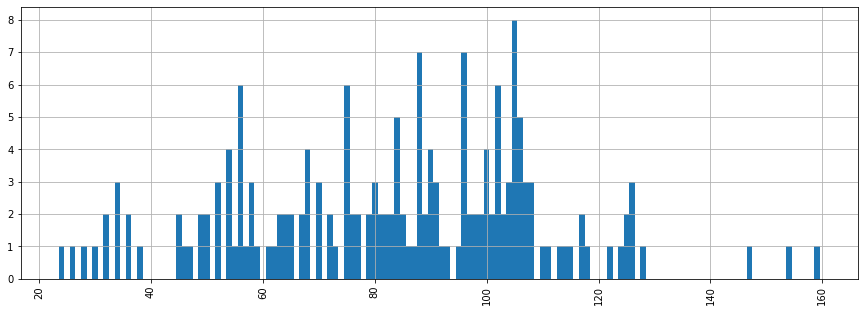

bulk_11


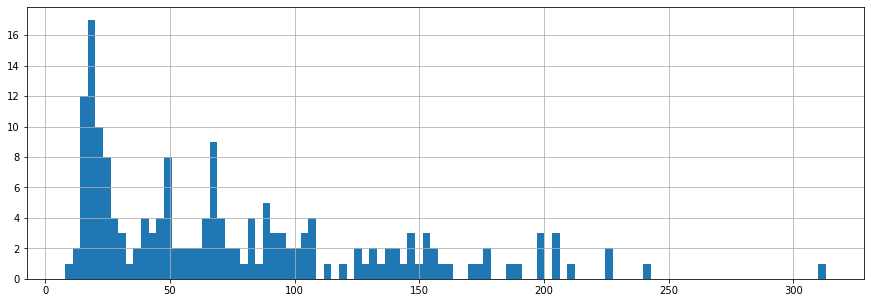

bulk_12


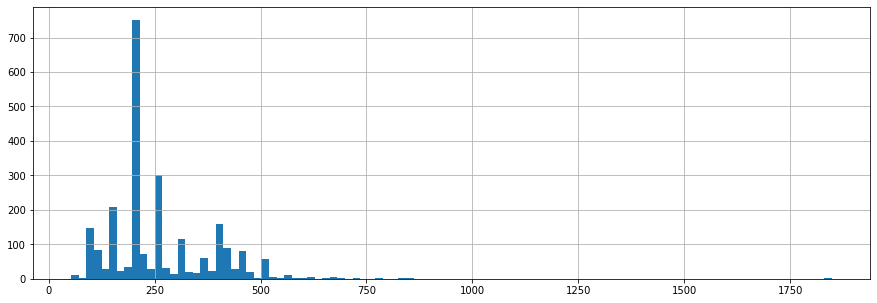

bulk_13


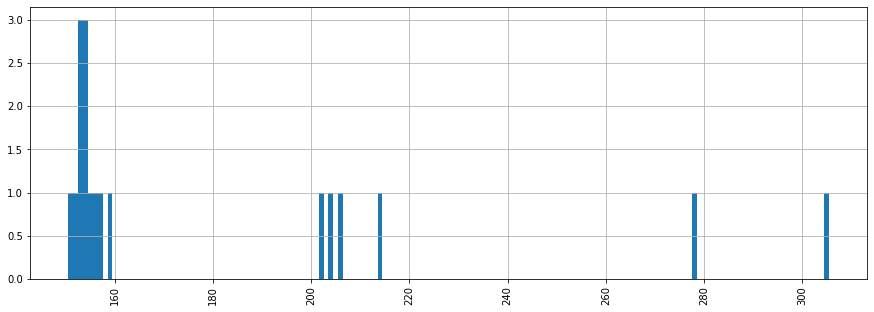

bulk_14


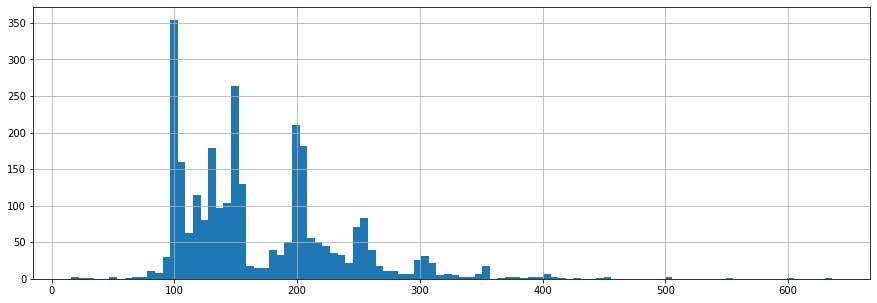

bulk_15


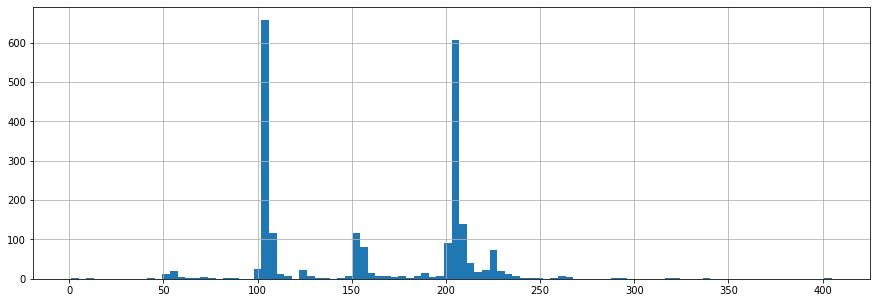

In [19]:
details(df_bulk)

<font color='DarkBlue'> 
📌 Исходя из текущей информации можно сделать следующие выводы: 

- аномальные выбросы во всех полях отсутствуют, присутствуют небольшие отклонения, например, по значениям объема примеси bulk_12, но наиболее вероятно, что это технологическая особенность. Для точной оценки необходима информация по нормальным диапазонам рассматриваемых параметров;    
- также на многих графиках заметны столбцы, описывающие наиболее часто встречающиеся значения, что наиболее выражено на гистограммах по сыпучим материалам bulk_1, bulk_12, bulk_15;
- примеси добавляются не все, только малое количество, необходимое для достижения требуемых параметров стали;
- значения всех параметров положительные ненулевые, следовательно, пропуски можно заменить нулями, так как выборки для обучения моделей не должны содержать пропуски. При обучении соответствующие параметры будут выделены алгоритмами    
</font>   

In [20]:
df_bulk = df_bulk.fillna(0)

<font color='DarkBlue'> 
📌 Значения объема сыпучих материалов имеют несоответствующий тип данных, необходимо преобразовать в целочисленный
</font>   

In [21]:
for i in df_bulk.select_dtypes(include=['float']):  
    if (df_bulk.loc[df_bulk[i] % 1 != 0, i].count() > 0):
        print(i)
    else:
        df_bulk[i] = df_bulk[i].astype('int')
df_bulk.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   key      3129 non-null   int64
 1   bulk_1   3129 non-null   int64
 2   bulk_2   3129 non-null   int64
 3   bulk_3   3129 non-null   int64
 4   bulk_4   3129 non-null   int64
 5   bulk_5   3129 non-null   int64
 6   bulk_6   3129 non-null   int64
 7   bulk_7   3129 non-null   int64
 8   bulk_8   3129 non-null   int64
 9   bulk_9   3129 non-null   int64
 10  bulk_10  3129 non-null   int64
 11  bulk_11  3129 non-null   int64
 12  bulk_12  3129 non-null   int64
 13  bulk_13  3129 non-null   int64
 14  bulk_14  3129 non-null   int64
 15  bulk_15  3129 non-null   int64
dtypes: int64(16)
memory usage: 391.2 KB


### Анализ датасета 'data_bulk_time'

<font color='DarkBlue'> 
📌 Необходимо отобразить основную информацию о следующей таблице <br>
</font> 

In [22]:
df_bulk_time = info('data_bulk_time.csv')

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None
 ----- Информация по заголовкам полей dataframe ----- 
Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


Количество явных дубликатов: 0


<font color='DarkBlue'>
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
- присутствует необходимость в редактировании заголовков, названия не представлены в условно общепринятом 'Змеиный регистр';
- отсутствуют явные дубликаты и необходимость удаления повторяющихся объектов;
- тип данных полей, содержащих временные значения, необходимо преобразовать в соответствующий;
- присутствуют пропуски в столбцах, необходимо обеспечить их заполнение;
- в исходных данных возможно наличие некорректных значений, требуется детальный анализ датасета;
- количество данных в текущем датасете совпадает с предыдущим, следовательно для каждому временному значению можно сопоставить соответствующий параметр
</font> 

In [23]:
col = []
for i in range(len(df_bulk_time.columns)):
    if df_bulk_time.columns[i] != 'key':
        col.append(df_bulk_time.columns[i].replace(' ', '_').lower()  + '_time')
    else:
        col.append(df_bulk_time.columns[i])
df_bulk_time.columns = col
display(df_bulk_time.head())

,key,bulk_1_time,bulk_2_time,bulk_3_time,bulk_4_time,bulk_5_time,bulk_6_time,bulk_7_time,bulk_8_time,bulk_9_time,bulk_10_time,bulk_11_time,bulk_12_time,bulk_13_time,bulk_14_time,bulk_15_time
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [24]:
for i in df_bulk_time.select_dtypes(include=['object']):
    df_bulk_time[i] = pd.to_datetime(df_bulk_time[i], format='%Y-%m-%d %H:%M:%S')
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           3129 non-null   int64         
 1   bulk_1_time   252 non-null    datetime64[ns]
 2   bulk_2_time   22 non-null     datetime64[ns]
 3   bulk_3_time   1298 non-null   datetime64[ns]
 4   bulk_4_time   1014 non-null   datetime64[ns]
 5   bulk_5_time   77 non-null     datetime64[ns]
 6   bulk_6_time   576 non-null    datetime64[ns]
 7   bulk_7_time   25 non-null     datetime64[ns]
 8   bulk_8_time   1 non-null      datetime64[ns]
 9   bulk_9_time   19 non-null     datetime64[ns]
 10  bulk_10_time  176 non-null    datetime64[ns]
 11  bulk_11_time  177 non-null    datetime64[ns]
 12  bulk_12_time  2450 non-null   datetime64[ns]
 13  bulk_13_time  18 non-null     datetime64[ns]
 14  bulk_14_time  2806 non-null   datetime64[ns]
 15  bulk_15_time  2248 non-null   datetime

<font color='DarkBlue'>
📌 Необходимо удостовериться в том, что все итерации технологического процесса в таблице по каждой партии заготовок, обозначенной идентификатором key, указаны в верной временной последовательности. Возможно потребуется сортировка <br>
</font> 

In [25]:
count_begin = 0
for i in df_bulk_time['key'].unique():
    for j in df_bulk_time.select_dtypes(include=['datetime']):
        if not df_bulk_time[(df_bulk_time['key'] == i) & (~df_bulk_time[j].isna())][j].is_monotonic:
            count_begin += 1
print('Количество зафиксированных нарушенных последовательностей технологического процесса в датасете:', count_begin)

Количество зафиксированных нарушенных последовательностей технологического процесса в датасете: 0


<font color='DarkBlue'>
📌 Необходимо вывести подробную информацию по таблице <br> 
</font> 

,key,bulk_1_time,bulk_2_time,bulk_3_time,bulk_4_time,bulk_5_time,bulk_6_time,bulk_7_time,bulk_8_time,bulk_9_time,bulk_10_time,bulk_11_time,bulk_12_time,bulk_13_time,bulk_14_time,bulk_15_time
count,3129.000000,252,22,1298,1014,77,576,25,1,19,176,177,2450,18,2806,2248
mean,1624.383509,2019-06-27 08:32:26.031746048,2019-07-09 02:04:44.545454336,2019-07-05 14:02:19.653312768,2019-06-30 17:27:38.687376896,2019-07-10 12:23:28.623376640,2019-07-03 15:57:30.003472384,2019-07-23 21:38:41.040000,2019-07-05 17:46:11,2019-06-21 00:53:43.157894912,2019-07-04 02:03:09.647727616,2019-07-11 23:35:46.310734336,2019-07-03 02:04:28.317142784,2019-06-29 02:00:06.722222336,2019-07-03 10:03:08.939059200,2019-07-03 16:07:21.480871936
min,1.000000,2019-05-03 17:50:19,2019-05-07 08:36:19,2019-05-03 20:13:36,2019-05-03 11:21:30,2019-05-07 08:36:19,2019-05-03 18:52:57,2019-05-07 11:37:42,2019-07-05 17:46:11,2019-05-14 00:04:56,2019-05-06 01:36:24,2019-05-05 16:45:05,2019-05-03 11:03:52,2019-05-05 00:39:35,2019-05-03 11:03:52,2019-05-03 11:03:52
25%,816.000000,2019-05-28 02:36:05.750000128,2019-05-26 21:24:43.249999872,2019-06-06 08:39:05.500000,2019-05-29 08:23:05.750000128,2019-06-17 19:42:11,2019-06-05 04:40:07,2019-07-17 11:25:12,2019-07-05 17:46:11,2019-05-14 02:37:23.500000,2019-05-31 15:29:27.500000,2019-06-12 19:24:37,2019-06-01 23:11:18,2019-05-27 22:41:40.750000128,2019-06-02 12:09:03.249999872,2019-06-02 18:47:20.249999872
50%,1622.000000,2019-06-23 02:31:45.500000,2019-07-23 15:06:49.500000,2019-07-01 17:13:22,2019-06-25 18:44:37.500000,2019-07-21 23:25:54,2019-07-06 03:56:28.500000,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500000,2019-07-20 18:08:09,2019-06-30 09:36:04,2019-06-28 22:21:35,2019-07-01 05:46:54.500000,2019-07-01 00:46:14.500000
75%,2431.000000,2019-07-27 00:38:33.249999872,2019-08-08 10:55:53.750000128,2019-08-06 14:11:27.750000128,2019-07-30 21:37:44,2019-08-08 11:51:23,2019-08-03 09:02:40.750000128,2019-08-08 12:03:38,2019-07-05 17:46:11,2019-08-11 11:43:13,2019-07-30 19:28:59,2019-08-06 18:01:34,2019-08-04 04:41:33.249999872,2019-07-31 15:31:55.249999872,2019-08-04 17:37:32,2019-08-04 22:40:55
max,3241.000000,2019-08-30 23:01:32,2019-08-08 17:34:38,2019-08-31 23:39:11,2019-08-30 17:36:30,2019-08-28 09:01:08,2019-09-01 03:12:40,2019-08-31 07:22:25,2019-07-05 17:46:11,2019-08-11 15:09:33,2019-08-30 01:30:42,2019-08-31 16:00:49,2019-09-01 01:39:41,2019-08-26 20:31:16,2019-09-01 04:05:34,2019-09-01 04:05:34
std,933.337642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все данные представлены в количественном формате
-----
key


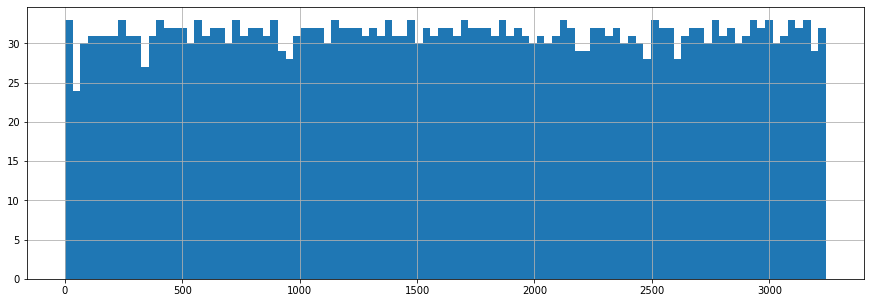

bulk_1_time


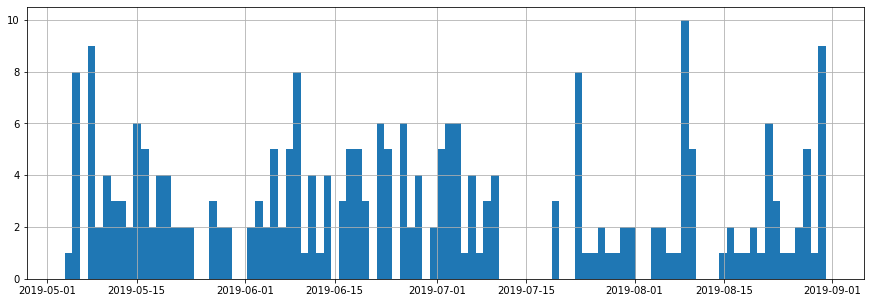

bulk_2_time


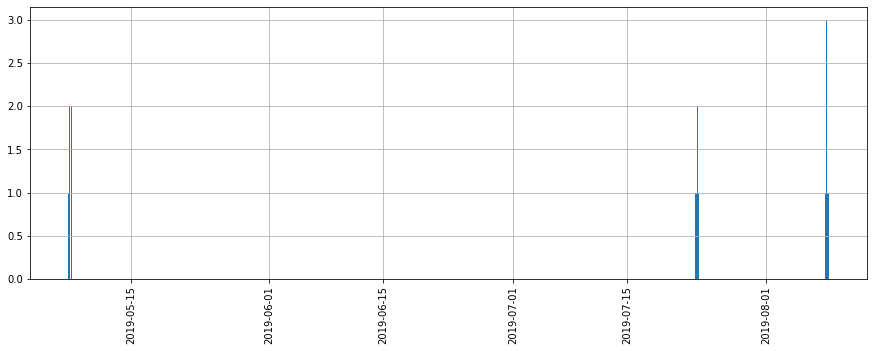

bulk_3_time


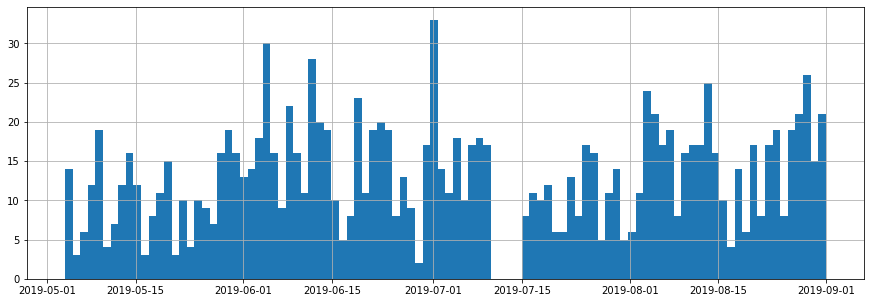

bulk_4_time


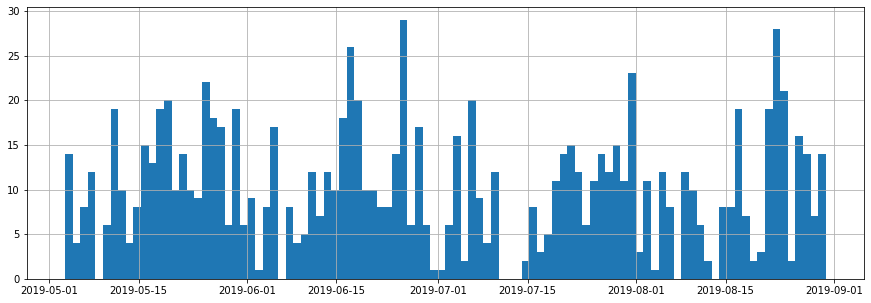

bulk_5_time


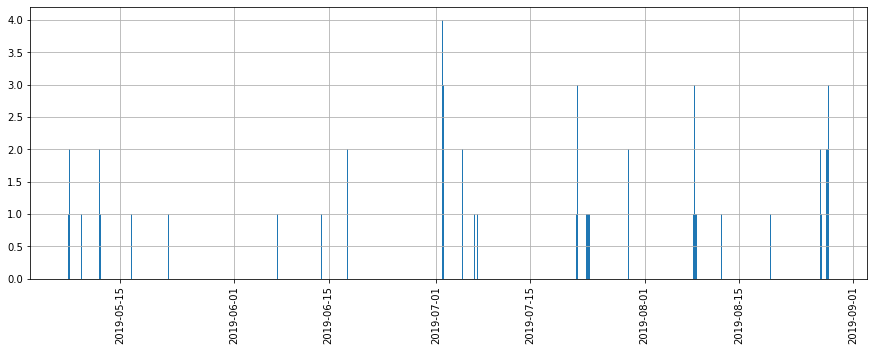

bulk_6_time


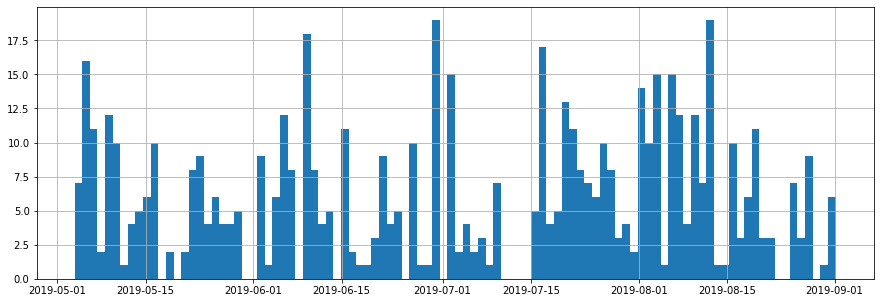

bulk_7_time


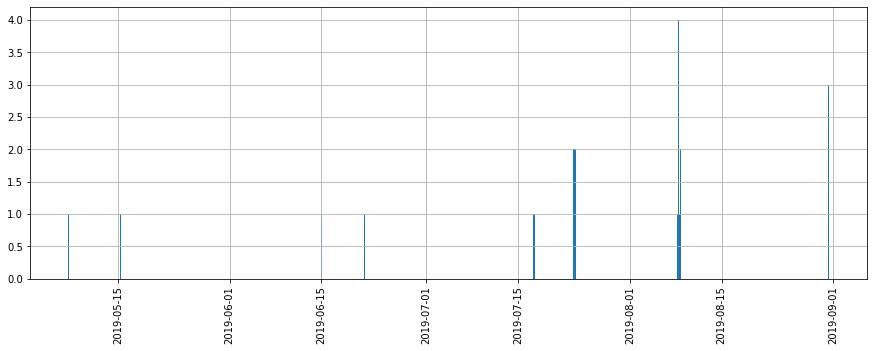

bulk_9_time


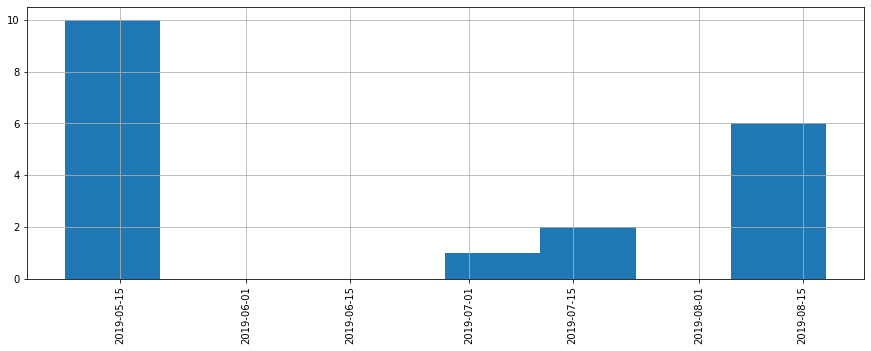

bulk_10_time


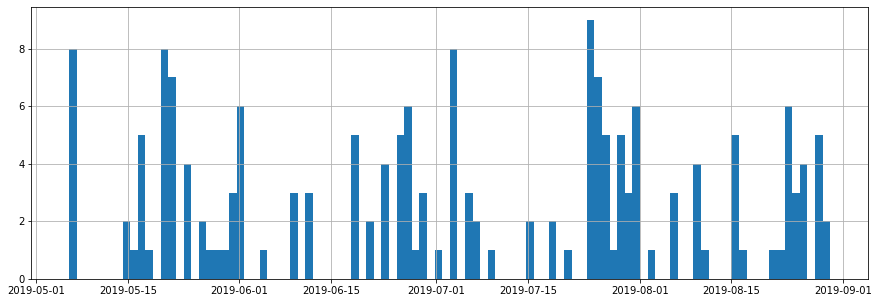

bulk_11_time


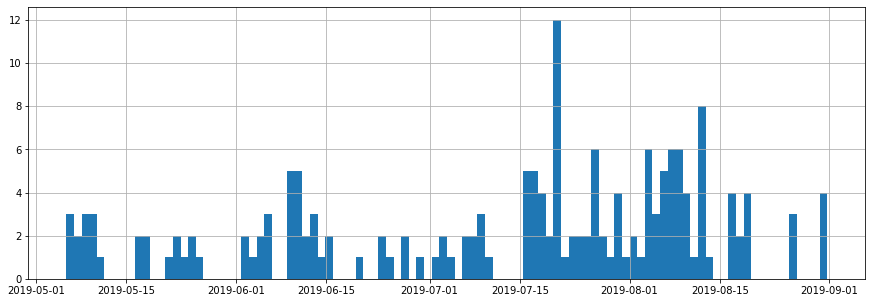

bulk_12_time


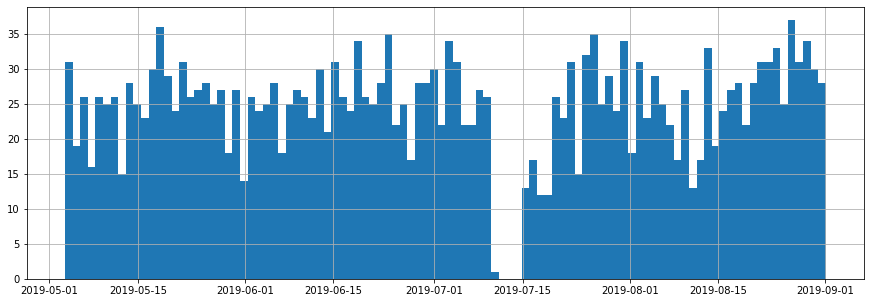

bulk_13_time


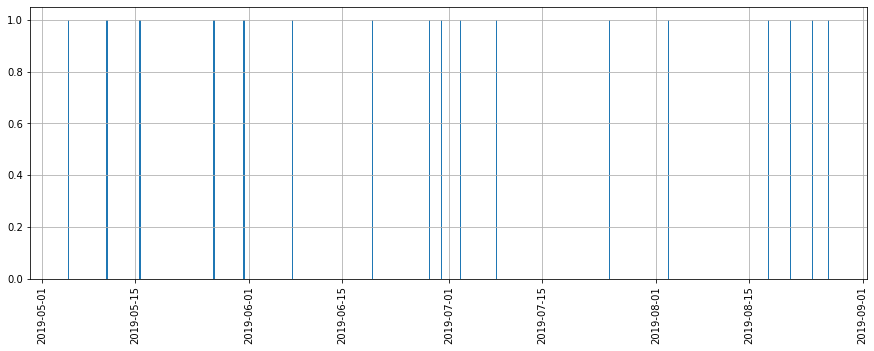

bulk_14_time


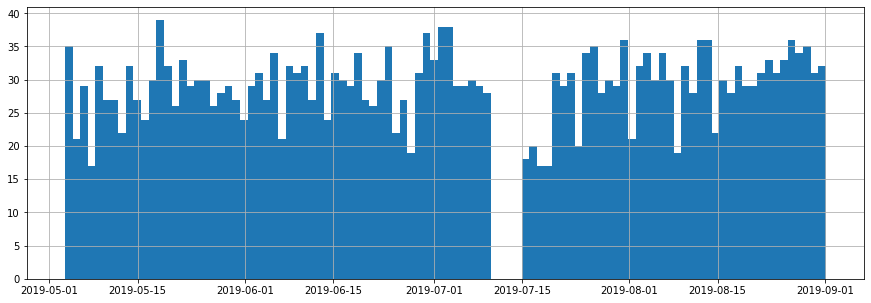

bulk_15_time


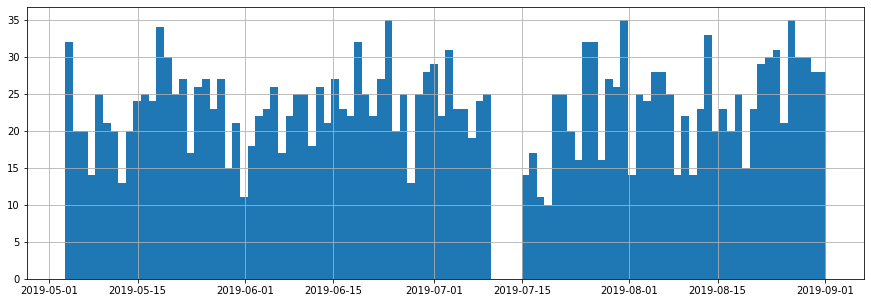

In [26]:
details(df_bulk_time)

<font color='DarkBlue'>
📌 Исходя из текущей визуализации можно сделать следующие выводы: 

- время подачи большинства примесей равномерно распределено на рассматриваемом интервале, но присутствуют редко используемые, которые скорее не окажут явного влияния на обучение моделей. Эти поля не следует удалять, так как возможно имеют или будут иметь значительное влияние, например, при изменении технологии;    
- по прежнему во всех полях присутствуют явно выраженные провалы на временных интервалах;  
- временные пропуски необходимо заменить отличными значениями, так как выборки для обучения моделей не должны содержать отсутствующие значения     
</font> 

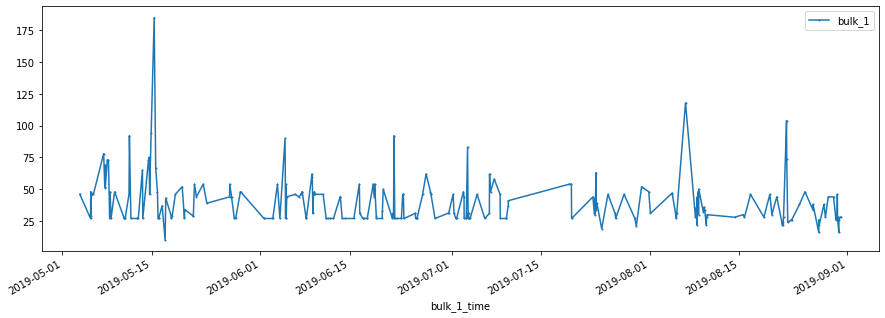

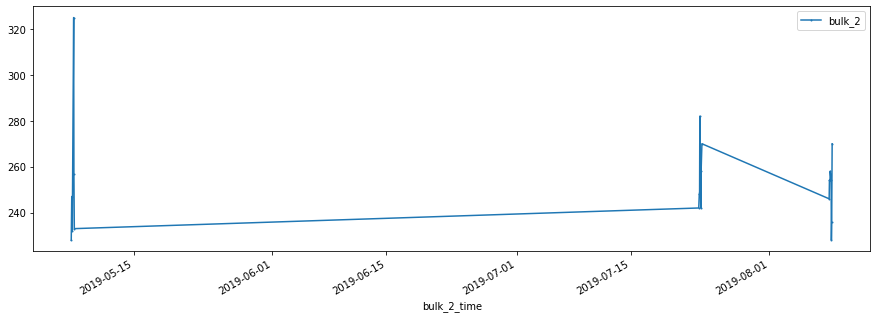

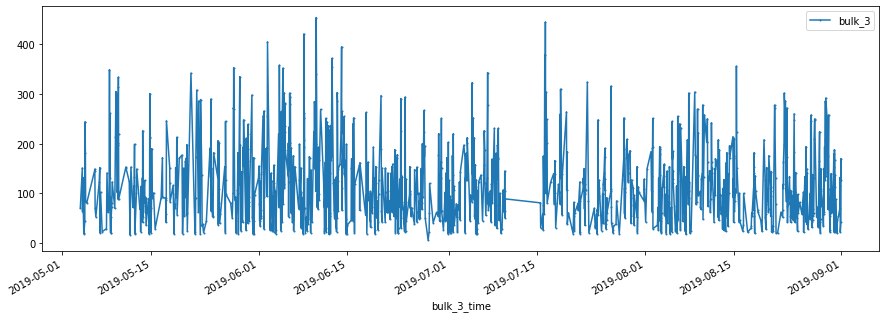

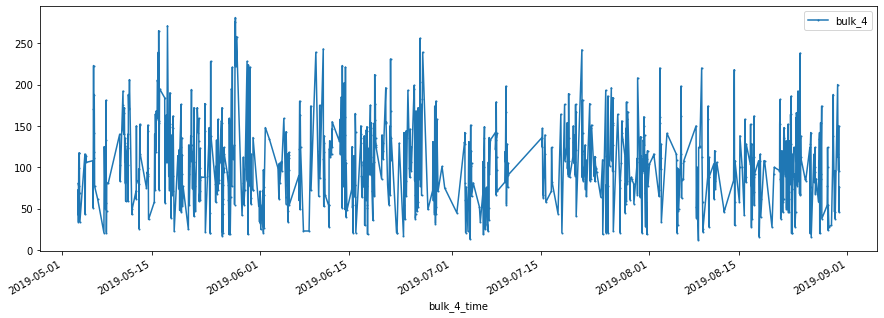

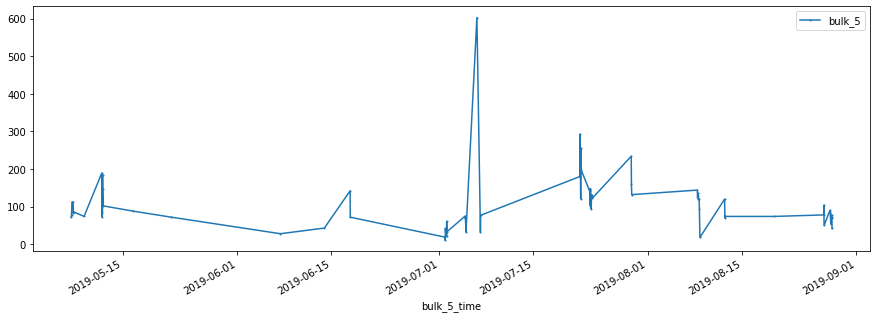

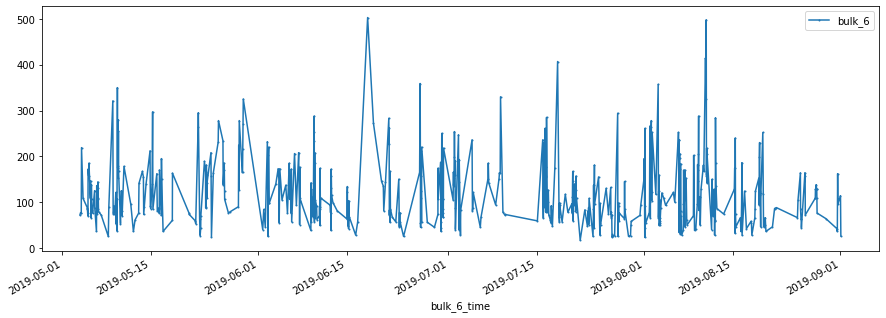

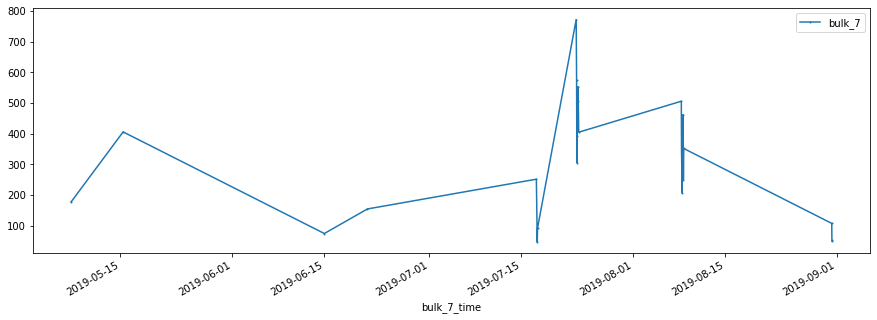

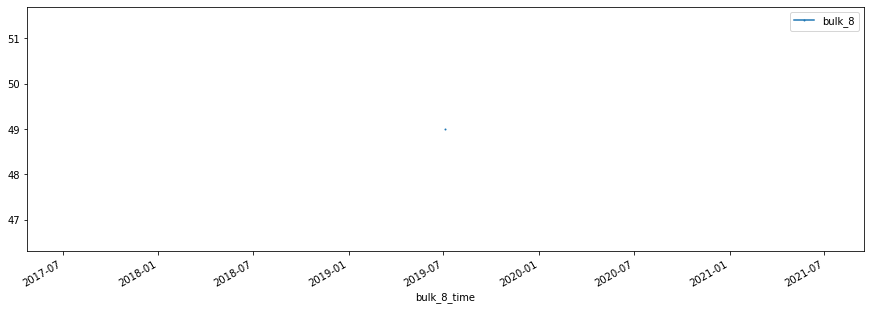

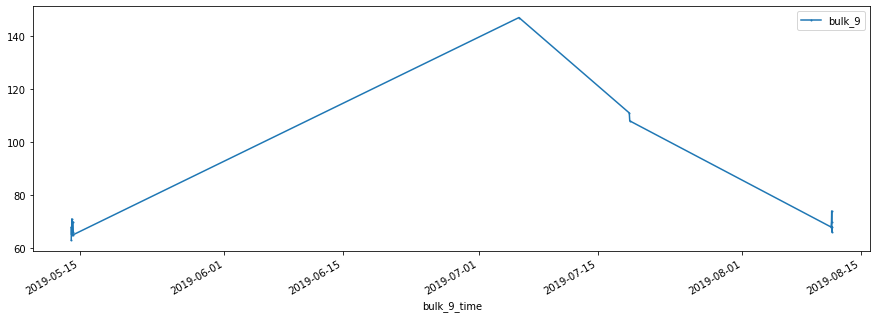

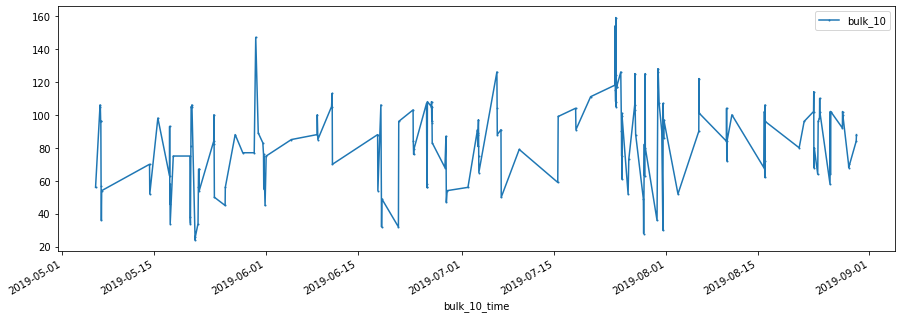

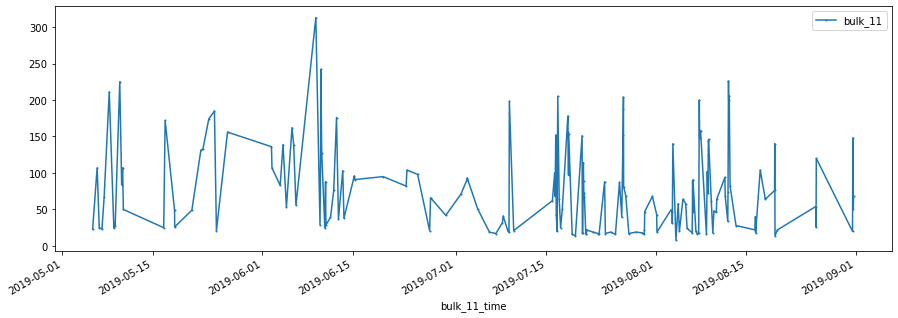

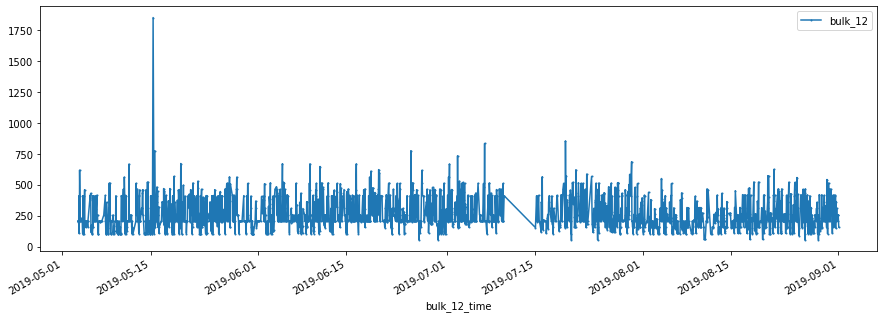

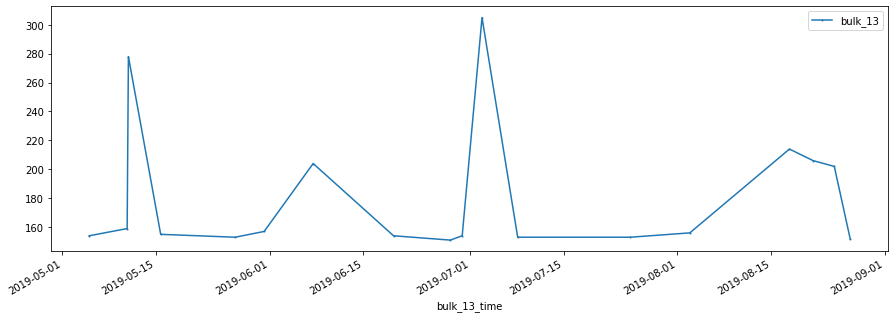

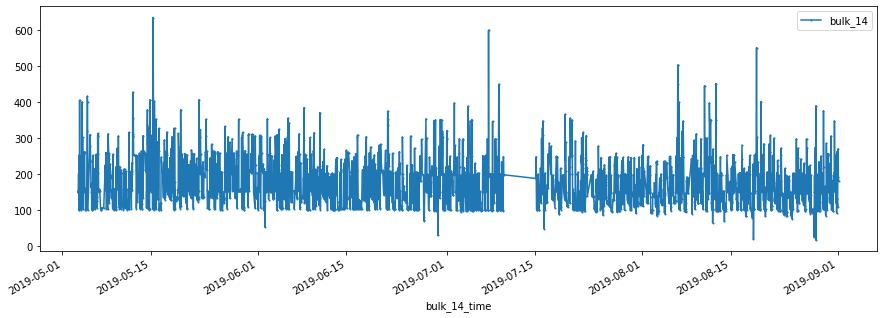

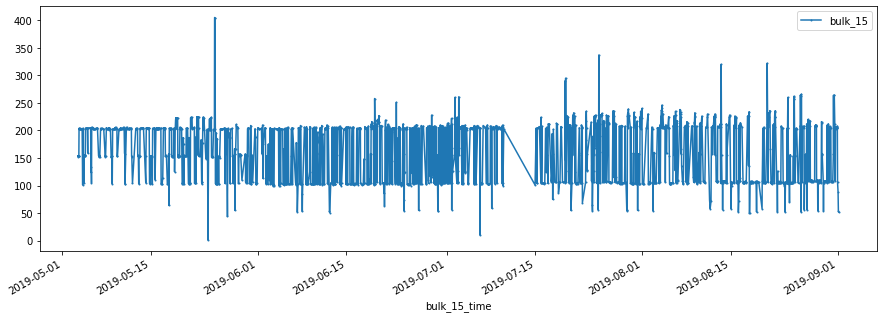

In [27]:
for i in range(len(df_bulk.columns)):
    if i > 0:
        pd.merge(df_bulk_time, df_bulk, on='key', how='inner').plot(x='bulk_' + str(i) + '_time', y='bulk_' + str(i), marker='.', markersize=2, figsize=(15,5))
        plt.show()

In [28]:
df_bulk_time = df_bulk_time.fillna(pd.Timestamp('20000101'))
df_bulk_time.head()

,key,bulk_1_time,bulk_2_time,bulk_3_time,bulk_4_time,bulk_5_time,bulk_6_time,bulk_7_time,bulk_8_time,bulk_9_time,bulk_10_time,bulk_11_time,bulk_12_time,bulk_13_time,bulk_14_time,bulk_15_time
0,1,2000-01-01,2000-01-01,2000-01-01,2019-05-03 11:21:30,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2019-05-03 11:03:52,2000-01-01,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,2000-01-01,2000-01-01,2000-01-01,2019-05-03 11:46:38,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2019-05-03 11:40:20,2000-01-01,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,2000-01-01,2000-01-01,2000-01-01,2019-05-03 12:31:06,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2019-05-03 12:09:40,2000-01-01,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,2000-01-01,2000-01-01,2000-01-01,2019-05-03 12:48:43,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2019-05-03 12:41:24,2000-01-01,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,2000-01-01,2000-01-01,2000-01-01,2019-05-03 13:18:50,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2019-05-03 13:12:56,2000-01-01,2019-05-03 13:12:56,2019-05-03 13:12:56


### Анализ датасета 'data_gas'

<font color='DarkBlue'> 
📌 Необходимо отобразить основную информацию следующей таблицы <br>
</font> 

In [29]:
df_gas = info('data_gas.csv')

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None
 ----- Информация по заголовкам полей dataframe ----- 
Index(['key', 'Газ 1'], dtype='object')
 ----- Отображение на экране первых записей dataframe ----- 


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Количество явных дубликатов: 0


<font color='DarkBlue'>
📌 В ходе анализа данных сформированы следующие выводы: <br>
    
- присутствует необходимость преобразования заголовка в условно общепринятый формат 'Змеиный регистр';
- отсутствуют явные дубликаты и необходимость удаления повторяющихся объектов;
- пропущенные значения отсутствуют;
- в исходных данных возможно наличие некорректных значений, требуется детальный анализ
</font> 

In [30]:
df_gas = df_gas.rename(columns={'Газ 1':'gas_1'})

,key,gas_1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Все данные представлены в количественном формате
-----
key


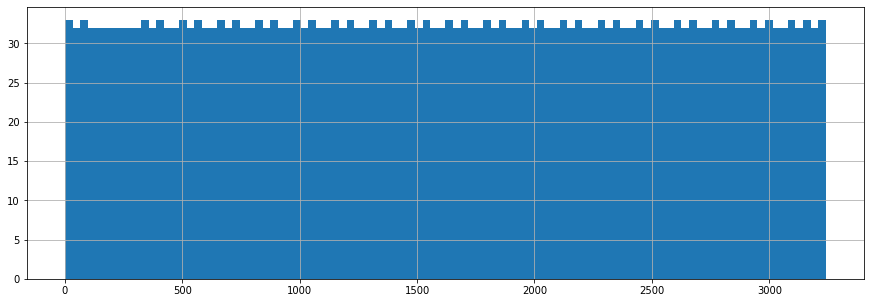

gas_1


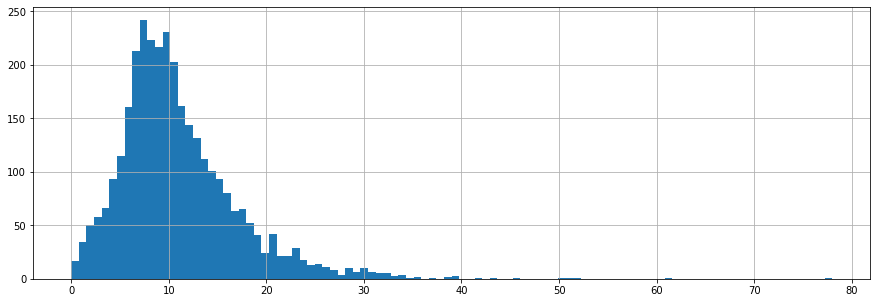

In [31]:
details(df_gas)

<font color='DarkBlue'>
📌 Исходя из предоставленных данных можно обозначить следующие выводы: 

- наблюдается нормальное распределение, немного скошено вправо, на всем протяжении пологого интервала заметно небольшое количество объектов, аномалии отсутствуют    
</font> 

### Анализ датасета 'data_temp'

<font color='DarkBlue'> 
📌 Необходимо отобразить основную информацию по следующей таблице, одной из основных <br>
</font> 

In [32]:
df_temp = info('data_temp.csv')

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None
 ----- Информация по заголовкам полей dataframe ----- 
Index(['key', 'Время замера', 'Температура'], dtype='object')
 ----- Отображение на экране первых записей dataframe ----- 


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Количество явных дубликатов: 0


<font color='DarkBlue'>
📌 В ходе анализа сформированы следующие выводы: <br>
    
- присутствует необходимость в редактировании заголовков, названия представлены в читаемом формате, но не в условно общепринятом 'Змеиный регистр', на текущем этапе изменение не требуется, нужные данные будут выделены и преобразованы;
- отсутствуют явные дубликаты, возможны дубликаты отдельных полей. Как было определено ранее, обработка некоторых партий производится одновременно;
- тип данных полей, содержащих временные значения, необходимо преобразовать;
- присутствуют пропуски по температуре, необходимо выполнить анализ;
- в исходных данных возможно наличие некорректных значений
</font> 

In [33]:
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


<font color='DarkBlue'>
📌 Необходимо удостовериться, что все итерации технологического процесса в таблице по каждой партии заготовок, обозначенной идентификатором key, указаны в верной временной последовательности <br>
</font> 

In [34]:
count_begin = 0
for i in df_temp['key'].unique():
    if not df_temp[df_temp['key'] == i]['Время замера'].is_monotonic:
        count_begin += 1
print('Количество элементов технологического процесса с нарушенной последовательностью в датасете:', count_begin)

Количество элементов технологического процесса с нарушенной последовательностью в датасете: 0


In [35]:
print('Отсутствие нарушения последовательности расположения партий в датасете по началу измерений:', df_temp.groupby('key')['Время замера'].first().is_monotonic)
print('Отсутствие нарушения последовательности расположения партий в датасете по окончанию измерений:', df_temp.groupby('key')['Время замера'].last().is_monotonic)
print('Количество пар партий с нарушенной последовательностью по началу измерений:', (((df_temp.groupby('key')['Время замера'].first() - df_temp.groupby('key')['Время замера'].first().shift(1)).dt.total_seconds()) < 0).sum())
print('Количество пар партий с нарушенной последовательностью по окончанию измерений:', (((df_temp.groupby('key')['Время замера'].last() - df_temp.groupby('key')['Время замера'].last().shift(1)).dt.total_seconds()) < 0).sum())

Отсутствие нарушения последовательности расположения партий в датасете по началу измерений: False
Отсутствие нарушения последовательности расположения партий в датасете по окончанию измерений: False
Количество пар партий с нарушенной последовательностью по началу измерений: 19
Количество пар партий с нарушенной последовательностью по окончанию измерений: 36


<font color='DarkBlue'>
📌 Выделено приблизительно такое же количество нарушений последовательностей, как в датасете 'data_arc'. Этот факт не влияет на обучение моделей, так как рассматриваются не временные ряды, последовательность не важна <br>
📌 Теперь необходимо отобразить более подробную информацию по таблице <br> 
</font> 

,key,Время замера,Температура
count,15907.000000,15907,13006.000000
mean,1607.880870,2019-07-02 09:55:01.000942848,1591.840920
min,1.000000,2019-05-03 11:16:18,1191.000000
25%,790.000000,2019-06-01 16:24:51.500000,1581.000000
50%,1618.000000,2019-06-30 10:31:14,1591.000000
75%,2427.000000,2019-08-03 12:07:59,1601.000000
max,3241.000000,2019-09-01 04:38:08,1705.000000
std,942.212073,NaN,21.375851


Все данные представлены в количественном формате
-----
key


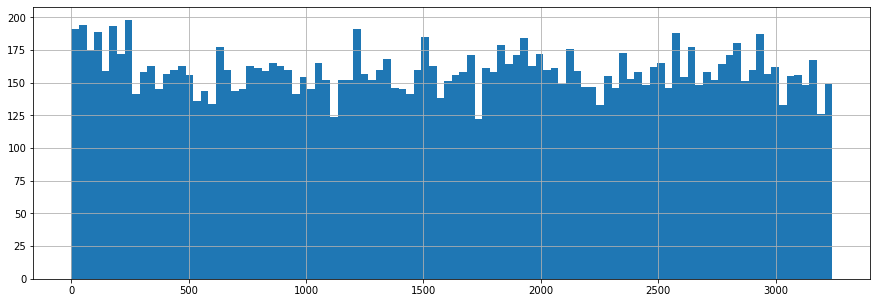

Время замера


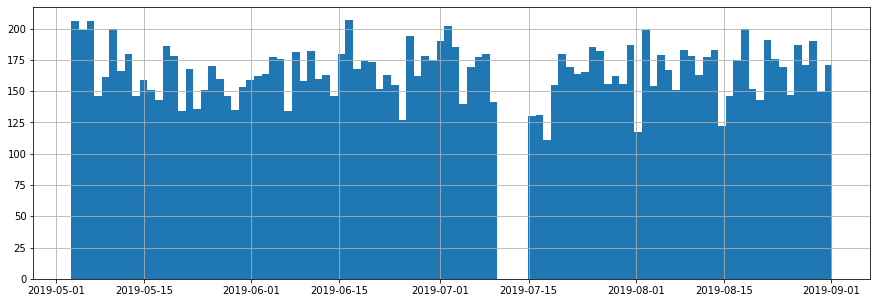

Температура


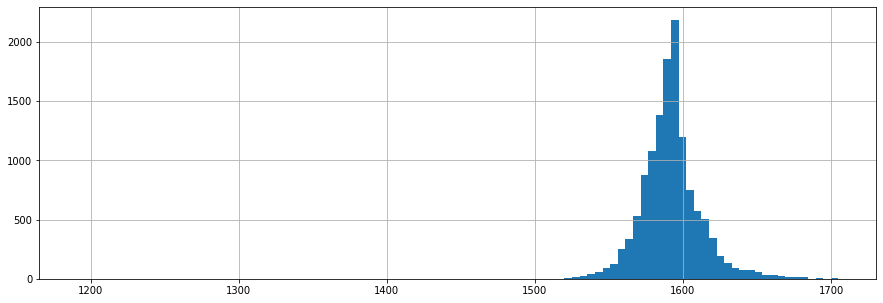

In [36]:
details(df_temp)

<font color='DarkBlue'> 
📌 По полученной информации определены следующие выводы: 
 
- по прежнему присутствуют ожидаемые пропуски в средней части временного интервала;
- распределение температуры нормальное, скошенное в левую сторону, но заметны длительные интервалы с почти малым количеством объектов, попадающих в них, скорее являющимися аномалиями. По технологии минимальная температура плавления стали 1400 градусов, следовательно, необходимо удалить записи партий, имеющих соответствующие расхождения 
</font>    

In [37]:
df_temp[df_temp['Температура'] < 1400]

,key,Время замера,Температура
4350,867,2019-06-04 14:21:00,1191.0
5978,1214,2019-06-16 05:32:00,1208.0
7958,1619,2019-06-30 11:03:54,1218.0
8913,1818,2019-07-07 00:30:49,1383.0
8914,1818,2019-07-07 00:31:40,1383.0
10127,2052,2019-07-21 14:51:40,1227.0
12564,2561,2019-08-08 07:34:15,1204.0


<font color='DarkBlue'> 
📌 Можно проверить минимальные значения температур, соответствующие технологическому процессу, то есть следующие за аномальными <br> 
</font>   

In [38]:
df_temp[df_temp['Температура'] > 1400]['Температура'].sort_values()

8206    1519.0
4561    1520.0
2675    1520.0
7388    1525.0
7389    1525.0
         ...  
8906    1696.0
1796    1700.0
8904    1702.0
1794    1704.0
1795    1705.0
Name: Температура, Length: 12999, dtype: float64

<font color='DarkBlue'> 
📌 Присутствует значительная разница между нормальными и аномальными значениями температур, причем нормальные после вышеуказанной границы достаточно плотно распределены <br> 
📌 Значений, не соответствующих технологии процессов, очень мало. Можно найти вероятность нахождения в выборке температурного значения ниже указанного. Для этого также можно построить график нормального распределения <br>  
</font>  

In [39]:
df_hyp = round(df_temp['Температура'].agg(['count','mean','std']), 2)
df_hyp

count    13006.00
mean      1591.84
std         21.38
Name: Температура, dtype: float64

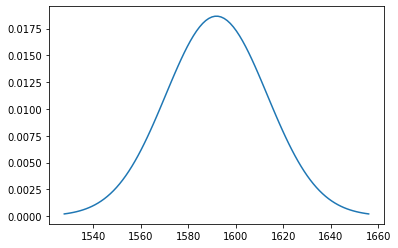

Вероятность получить значение температуры 1519: 0.0003284990677734303


In [40]:
plt.plot(np.linspace(df_hyp['mean'] - 3 * df_hyp['std'], df_hyp['mean'] + 3 * df_hyp['std'], num=100),scipy.stats.norm.pdf(np.linspace(df_hyp['mean'] - 3 * df_hyp['std'], df_hyp['mean'] + 3 * df_hyp['std'], num=100), df_hyp['mean'], df_hyp['std']))
plt.show()
distr = scipy.stats.norm(df_hyp['mean'], df_hyp['std']) 
result = distr.cdf(1519)
print('Вероятность получить значение температуры 1519:', result) 

<font color='DarkBlue'> 
📌 Исходя из полученной вероятности нахождения указанного значения параметра, можно предположить, что пороговое значение нормального распределения по температуре для признания его достоверным - 0,3%. Рассматривается одностороннее предположение <br> 
</font>  

In [41]:
print('Минимальное значение при пороговом значении 0.3% для признания его достоверным (не выбросом и случайной аномалией):', round(scipy.stats.norm(df_hyp['mean'], df_hyp['std']).ppf(0.0003), 2) if scipy.stats.norm(df_hyp['mean'], df_hyp['std']).ppf(0.0003) > 0 else 0)

Минимальное значение при пороговом значении 0.3% для признания его достоверным (не выбросом и случайной аномалией): 1518.47


<font color='DarkBlue'> 
📌 Теперь необходимо удалить все партии, имеющие аномальные значения температур на любой итерации замеров <br> 
</font>

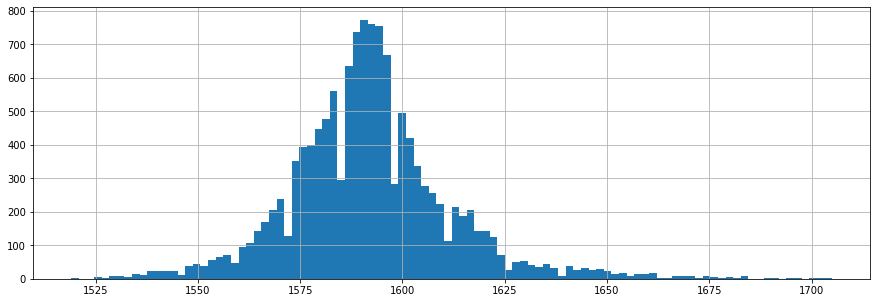

In [42]:
df_temp = df_temp[~df_temp['key'].isin(df_temp[df_temp['Температура'] < 1400]['key'].unique())].reset_index(drop=True)
df_temp['Температура'].hist(bins=100, range=[df_temp['Температура'].min(), df_temp['Температура'].max()], figsize=(15,5))
plt.show()

<font color='DarkBlue'> 
📌 Заметны провалы значений по температуре, возможно специально удаленных по определенному критерию искомого параметра <br> 
📌 В датасете в поле со значениями температуры наблюдаются пропуски. Необходимо осуществить подсчет количества записей с пропущенными первыми значениями температуры, все записи в каждой партии упорядочены по времени <br> 
</font>

In [43]:
print('Количество пропусков первых значений температуры для каждой партии:', df_temp.groupby('key')['Температура'].first().isna().sum())

Количество пропусков первых значений температуры для каждой партии: 0


<font color='DarkBlue'> 
📌 Целевым признаком исходной задачи является основной параметр финального замера температуры после выполнения всех манипуляций, соответствующих последовательности технологического процесса <br>
📌 Первое значение замера температуры присутствует в каждой партии, это один из основных признаков для определения целевого <br>
📌 Соответственно, в исходных данных должны присутствовать начальное и конечное значения температур. Необходимо удалить партии, содержащие только одну запись, так как необходимость наличия подобных объектов для обучения моделей отпадает <br> 
</font>

In [44]:
df_single = df_temp.groupby('key')['Время замера'].count() == 1
print('Количество партий с одной записью в таблице:', df_single.sum())

Количество партий с одной записью в таблице: 2


In [45]:
df_temp[df_temp['key'].isin(df_single[df_single == True].index)]

,key,Время замера,Температура
1100,195,2019-05-10 14:10:23,1583.0
1554,279,2019-05-13 23:07:28,1603.0


In [46]:
df_temp = df_temp[~df_temp['key'].isin(df_single[df_single == True].index)].reset_index(drop=True)
df_temp

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
15850,3241,2019-09-01 04:03:30,1586.0
15851,3241,2019-09-01 04:16:12,NaN
15852,3241,2019-09-01 04:22:39,NaN
15853,3241,2019-09-01 04:33:42,NaN


<font color='DarkBlue'> 
📌 Необходимо выделить массив идентификаторов партий, содержащих пропуски в поле 'Температура', и сравнить с массивом объектов с пропущенными последними значениями температур <br> 
</font>

In [47]:
print('Количество партий с пропущенными значениями температур:', len(df_temp[df_temp['Температура'].isna()]['key'].unique()))
print('Количество партий с пропущенными последними значениями температур:', df_temp.groupby('key')['Температура'].agg(lambda x: x.values[-1]).isna().sum())

Количество партий с пропущенными значениями температур: 738
Количество партий с пропущенными последними значениями температур: 738


<font color='DarkBlue'> 
📌 Количество партий одинаково, следовательно, последнее значение температуры не указано в партиях, где присутствует хоть один пропуск <br> 
📌 Необходимо создать выборку только с этими ключами. В текущей задаче ее можно использовать в качестве финальной тестовой <br>
</font>

In [48]:
keys_null = df_temp[df_temp['Температура'].isna()]['key'].unique()
df_temp_final_test = df_temp[df_temp['key'].isin(keys_null)].reset_index(drop=True)
df_temp_final_test

,key,Время замера,Температура
0,2500,2019-08-06 03:11:31,1539.0
1,2500,2019-08-06 03:24:43,NaN
2,2500,2019-08-06 03:25:16,NaN
3,2500,2019-08-06 03:28:21,NaN
4,2501,2019-08-06 03:44:42,1587.0
...,...,...,...
3629,3241,2019-09-01 04:03:30,1586.0
3630,3241,2019-09-01 04:16:12,NaN
3631,3241,2019-09-01 04:22:39,NaN
3632,3241,2019-09-01 04:33:42,NaN


<font color='DarkBlue'> 
📌 Вероятно, что номера идентификаторов подобных партий начинаются с 2500. Необходимо уточнить максимальное значение ключа, объекты которого не имеют пропущенных значений <br> 
</font>

In [49]:
print('Максимальный номер партии, записи которой не имеют пропуски:', df_temp[~df_temp['key'].isin(keys_null)]['key'].max())

Максимальный номер партии, записи которой не имеют пропуски: 2499


<font color='DarkBlue'> 
📌 На основании подтвержденного предположения выше нужно создать выборку, не содержащую пропусков в поле 'Температура', используемую в дальнейшем обучении моделей <br> 
</font>

In [50]:
df_temp = df_temp[~df_temp['key'].isin(keys_null)].reset_index(drop=True)
df_temp

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
12216,2498,2019-08-06 02:19:26,1593.0
12217,2498,2019-08-06 02:25:31,1594.0
12218,2499,2019-08-06 02:40:25,1569.0
12219,2499,2019-08-06 02:54:24,1604.0


### Анализ датасета 'data_wire'

<font color='DarkBlue'> 
📌 Необходимо отобразить основную информацию из следующей таблицы <br>
</font> 

In [51]:
df_wire = info('data_wire.csv')

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None
 ----- Информация по заголовкам полей dataframe ----- 
Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')
 ----- Отображение на экране первых записей dataframe ----- 


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количество явных дубликатов: 0


<font color='DarkBlue'>
📌 В ходе анализа сформированы следующие выводы: <br>
    
- присутствует необходимость в редактировании заголовков, названия не представлены в условно общепринятом 'Змеиный регистр';
- отсутствуют явные дубликаты;
- необходимость конвертации типов данных отсутствует;
- присутствуют пропуски в столбцах, необходимо их проанализировать и заполнить;
- в исходных данных возможно наличие некорректных значений, требуется детальный анализ
</font> 

In [52]:
col = []
for i in range(len(df_wire.columns)):
    col.append(df_wire.columns[i].replace(' ', '_').lower())
df_wire.columns = col
display(df_wire.head())

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='DarkBlue'>
📌 Нужно отобразить подробную информацию по текущей таблице <br> 
</font> 

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Все данные представлены в количественном формате
-----
key


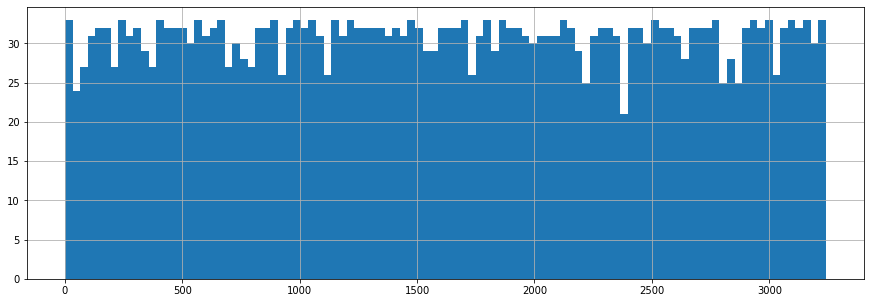

wire_1


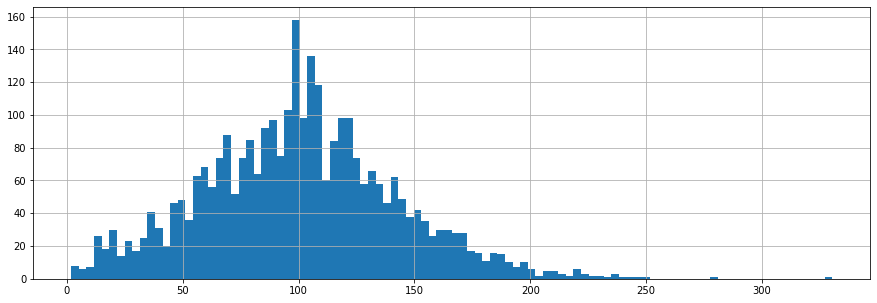

wire_2


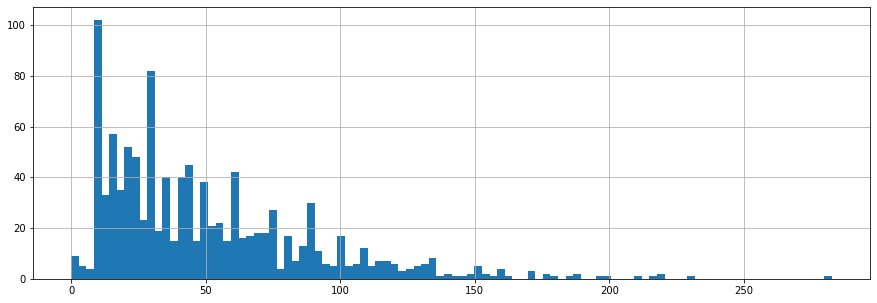

wire_3


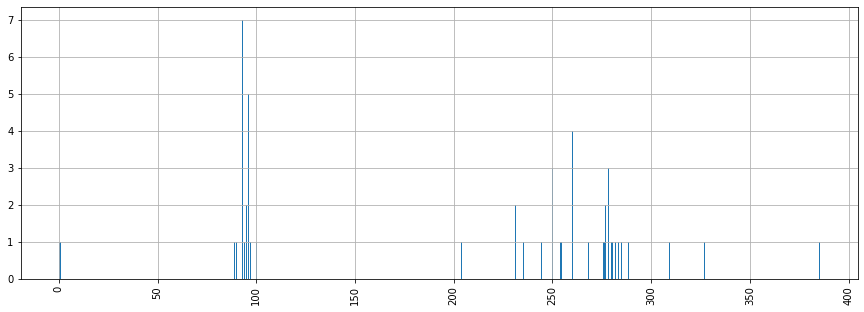

wire_4


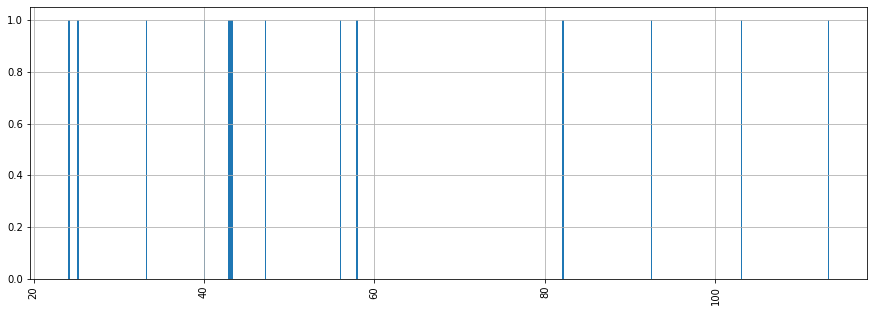

wire_6


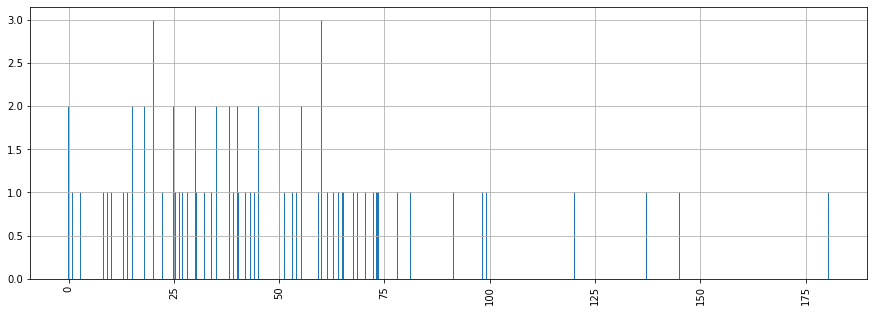

wire_7


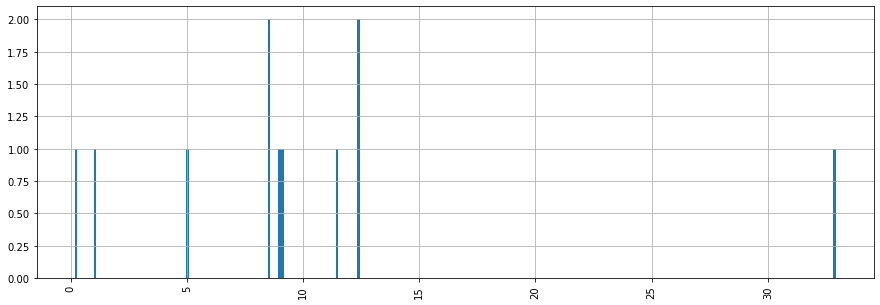

wire_8


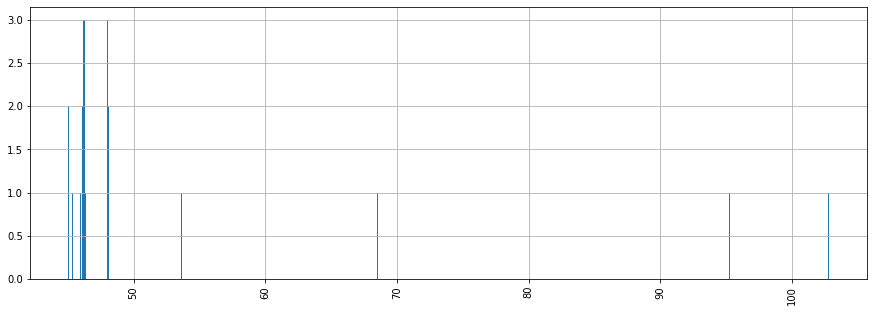

wire_9


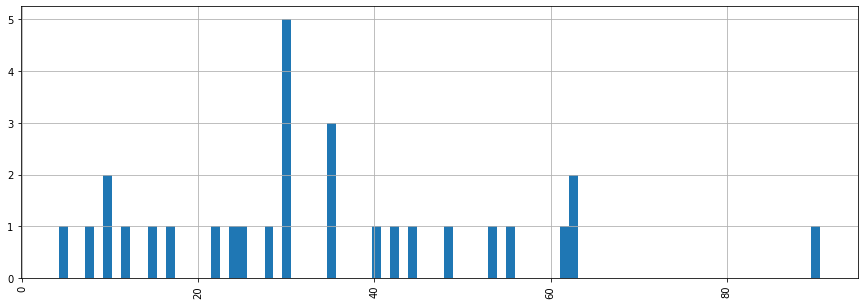

In [53]:
details(df_wire)

<font color='DarkBlue'> 
📌 Из указанной информации можно сформировать следующие выводы: 

- аномальные выбросы во всех полях отсутствуют, присутствуют небольшие отклонения. Для точной оценки необходима информация по нормальным диапазонам рассматриваемых параметров;    
- значения всех параметров положительные, следовательно, отсутствующие можно заменить нулевыми    
</font>

In [54]:
df_wire = df_wire.fillna(0)
df_wire.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
 3   wire_3  3081 non-null   float64
 4   wire_4  3081 non-null   float64
 5   wire_5  3081 non-null   float64
 6   wire_6  3081 non-null   float64
 7   wire_7  3081 non-null   float64
 8   wire_8  3081 non-null   float64
 9   wire_9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


### Анализ датасета 'data_wire_time'

<font color='DarkBlue'> 
📌 Необходимо отобразить основную информацию оставшейся таблицы <br>
</font> 

In [55]:
df_wire_time = info('data_wire_time.csv')

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None
 ----- Информация по заголовкам полей dataframe ----- 
Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')
 ----- Отображение на экране первых записей dataframe ----- 


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количество явных дубликатов: 0


<font color='DarkBlue'>
📌 В процессе первичного анализа обозначены следующие выводы: <br>
    
- присутствует необходимость в редактировании заголовков, названия не представлены в условно общепринятом 'Змеиный регистр';
- отсутствуют явные дубликаты и необходимость удаления повторяющихся объектов;
- тип данных полей, содержащих временные значения, необходимо преобразовать;
- присутствуют пропуски в столбцах, необходимо обеспечить их заполнение;
- в исходных данных возможно наличие некорректных значений, требуется детальный анализ датасета
</font> 

In [56]:
col = []
for i in range(len(df_wire_time.columns)):
    if df_bulk_time.columns[i] != 'key':
        col.append(df_wire_time.columns[i].replace(' ', '_').lower()  + '_time')
    else:
        col.append(df_wire_time.columns[i])    
df_wire_time.columns = col
display(df_wire_time.head())

,key,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
for i in df_wire_time.select_dtypes(include=['object']):
    df_wire_time[i] = pd.to_datetime(df_wire_time[i], format='%Y-%m-%d %H:%M:%S')
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          3081 non-null   int64         
 1   wire_1_time  3055 non-null   datetime64[ns]
 2   wire_2_time  1079 non-null   datetime64[ns]
 3   wire_3_time  63 non-null     datetime64[ns]
 4   wire_4_time  14 non-null     datetime64[ns]
 5   wire_5_time  1 non-null      datetime64[ns]
 6   wire_6_time  73 non-null     datetime64[ns]
 7   wire_7_time  11 non-null     datetime64[ns]
 8   wire_8_time  19 non-null     datetime64[ns]
 9   wire_9_time  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


<font color='DarkBlue'>
📌 Необходимо удостовериться в том, что все итерации технологического процесса в таблице по каждой партии заготовок, обозначенной идентификатором key, указаны в верной временной последовательности <br>
</font> 

In [58]:
count_begin = 0
for i in df_wire_time['key'].unique():
    for j in df_wire_time.select_dtypes(include=['datetime']):
        if not df_wire_time[(df_wire_time['key'] == i) & (~df_wire_time[j].isna())][j].is_monotonic:
            count_begin += 1
print('Количество зафиксированных нарушенных последовательностей технологического процесса в датасете:', count_begin)

Количество зафиксированных нарушенных последовательностей технологического процесса в датасете: 0


<font color='DarkBlue'>
📌 Необходимо вывести подробную информацию по таблице <br> 
</font> 

,key,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
count,3081.000000,3055,1079,63,14,1,73,11,19,29
mean,1623.426485,2019-07-03 02:48:18.296235776,2019-07-04 03:36:02.886005504,2019-07-07 13:45:31.634920704,2019-07-08 10:06:53.999999744,2019-08-08 16:01:07,2019-07-04 11:29:18.273972480,2019-08-02 18:36:35.818181632,2019-06-21 00:52:37.894736896,2019-06-28 18:07:46.931034624
min,1.000000,2019-05-03 11:11:41,2019-05-03 13:32:06,2019-05-04 04:47:53,2019-05-07 08:48:23,2019-08-08 16:01:07,2019-05-07 08:37:20,2019-07-23 12:08:44,2019-05-14 00:03:32,2019-05-04 16:09:11
25%,823.000000,2019-06-03 02:59:53.500000,2019-06-03 21:52:38,2019-06-09 14:51:42.500000,2019-07-17 08:17:59,2019-08-08 16:01:07,2019-05-08 13:11:38,2019-07-23 19:31:31,2019-05-14 02:36:03.500000,2019-06-07 20:28:19
50%,1619.000000,2019-06-30 14:38:56,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500000,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
75%,2434.000000,2019-08-03 22:58:26,2019-08-04 13:10:39.500000,2019-08-08 10:03:45,2019-07-23 15:27:14.750000128,2019-08-08 16:01:07,2019-08-08 20:28:45,2019-08-08 12:43:10.500000,2019-08-11 11:43:21.500000,2019-08-04 20:48:59
max,3241.000000,2019-09-01 04:16:01,2019-08-31 18:50:15,2019-08-28 02:11:18,2019-08-08 12:03:12,2019-08-08 16:01:07,2019-08-14 00:59:11,2019-08-08 18:27:34,2019-08-11 15:09:29,2019-08-29 03:51:31
std,932.996726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все данные представлены в количественном формате
-----
key


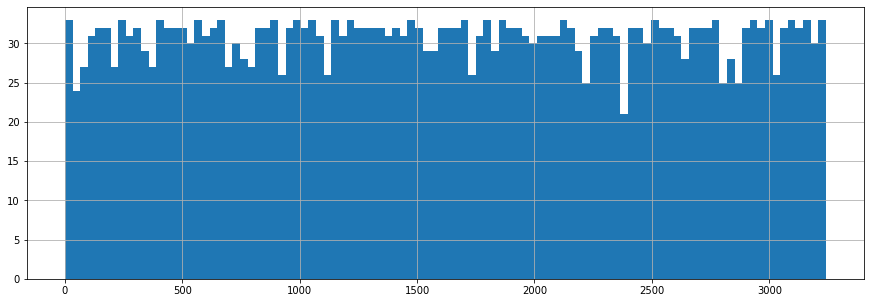

wire_1_time


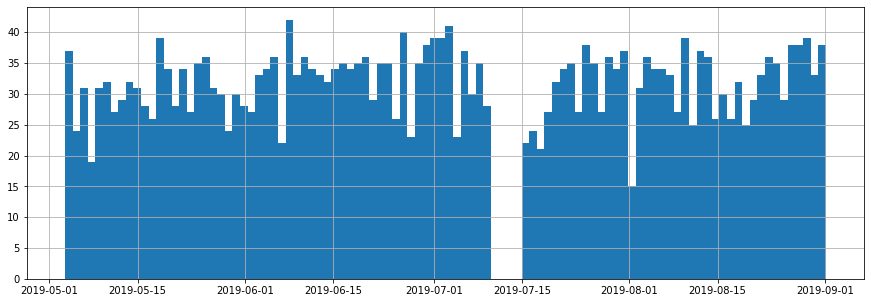

wire_2_time


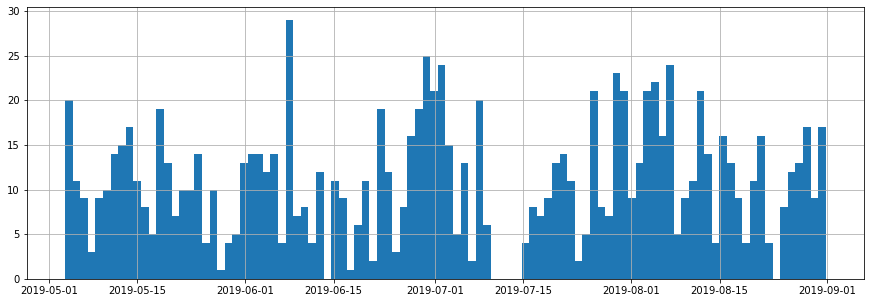

wire_3_time


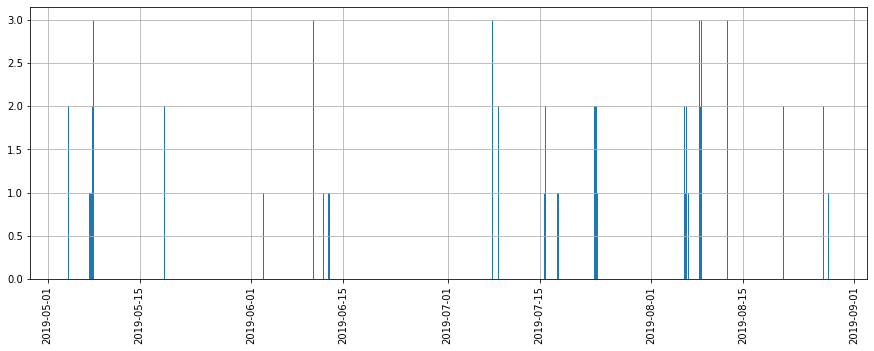

wire_4_time


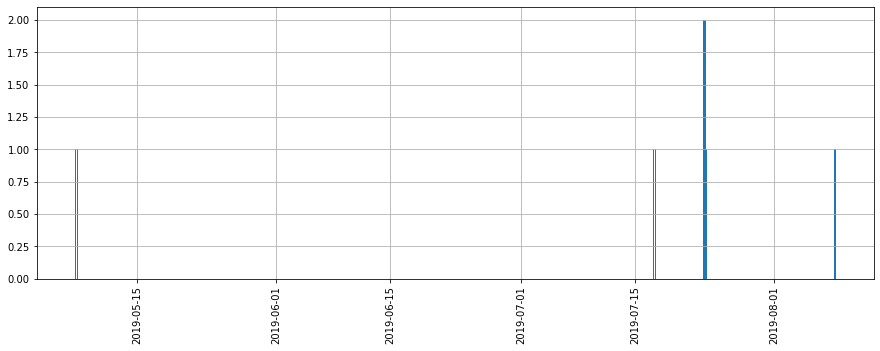

wire_6_time


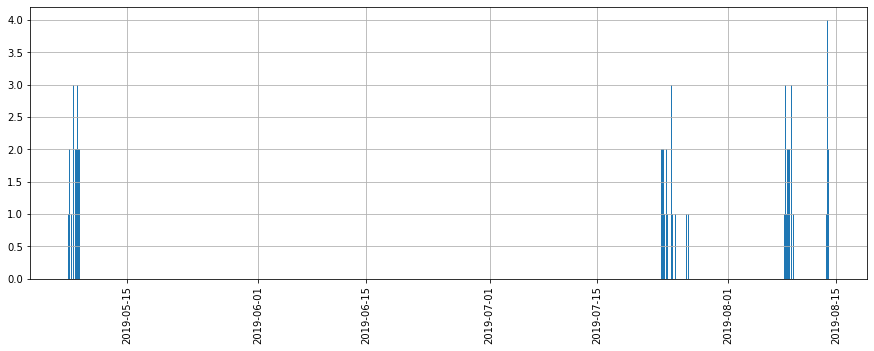

wire_7_time


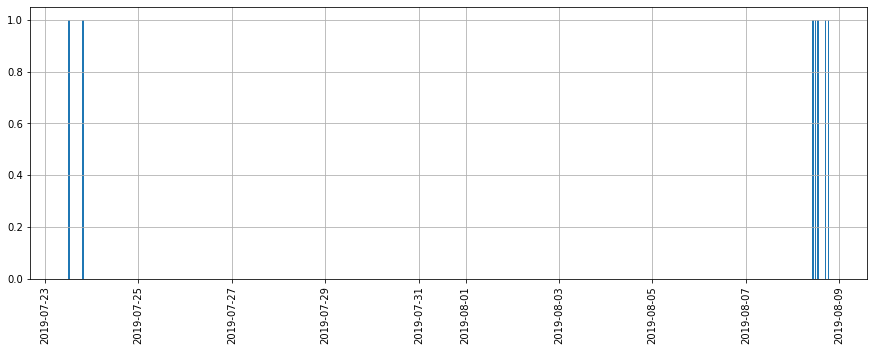

wire_8_time


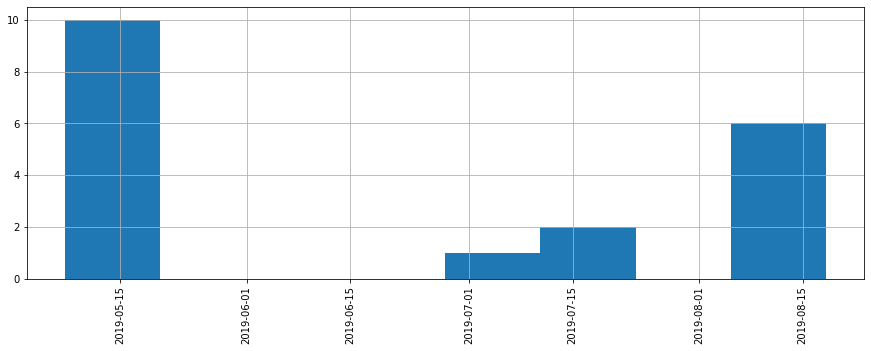

wire_9_time


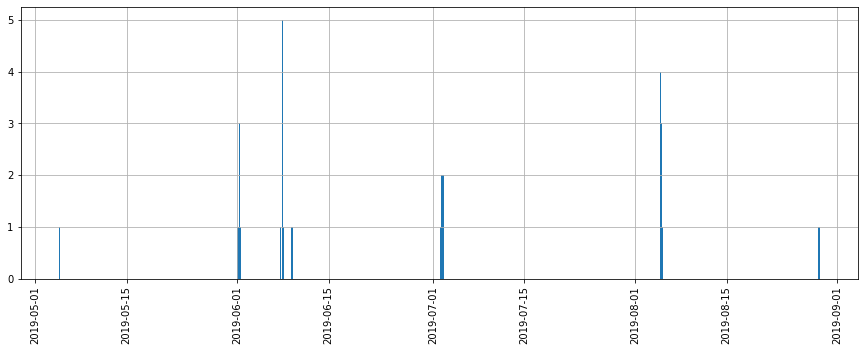

In [59]:
details(df_wire_time)

<font color='DarkBlue'>
📌 Исходя из текущей визуализации можно сделать следующие выводы: 

- время подачи проволочных меатериалов равномерно и неравномерно распределено на рассматриваемом интервале, присутствуют редко используемые;
- так же во всех полях присутствуют явно выраженное отсутствие значений на некотором временном интервале;  
- временные пропуски необходимо заменить отличными значениями, так как выборки для обучения моделей не должны содержать отсутствующие   
</font> 

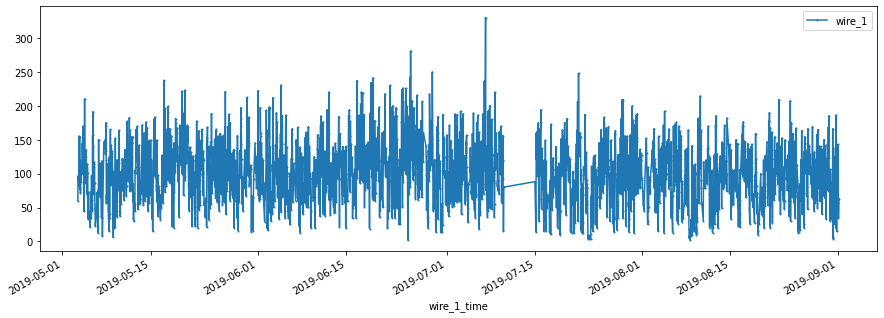

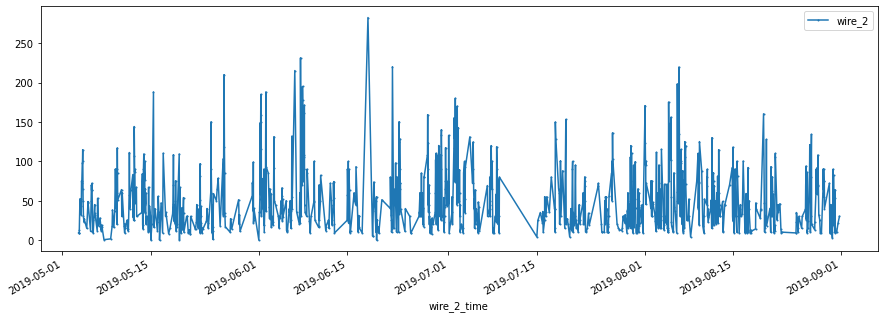

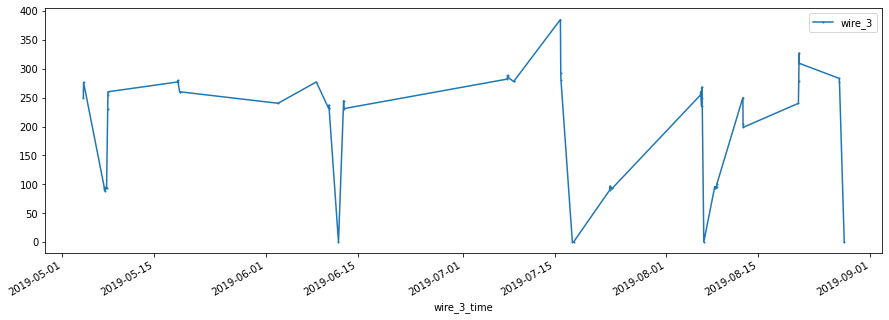

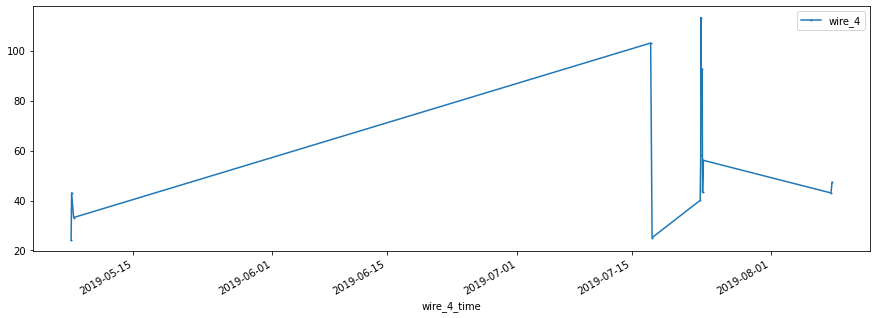

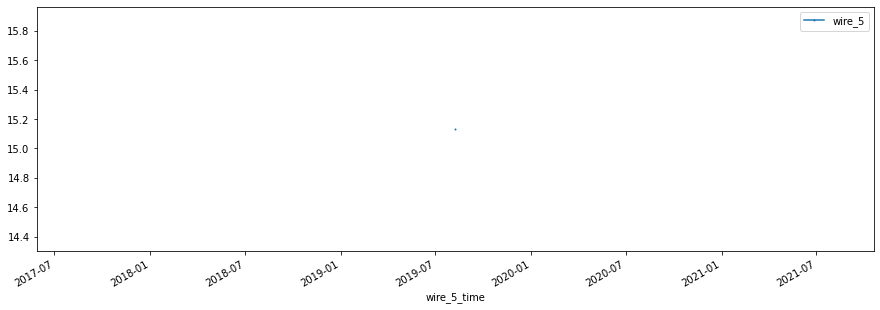

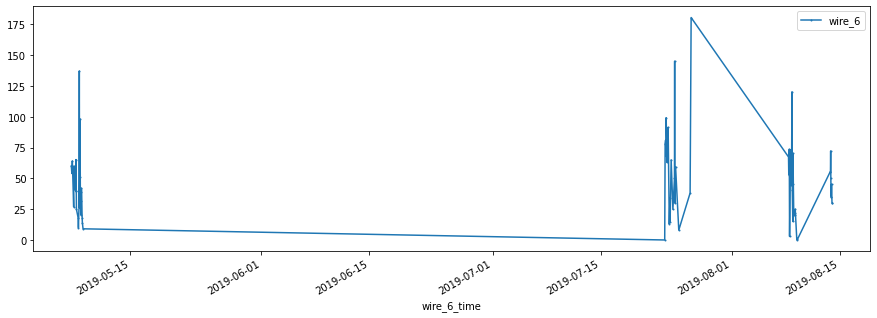

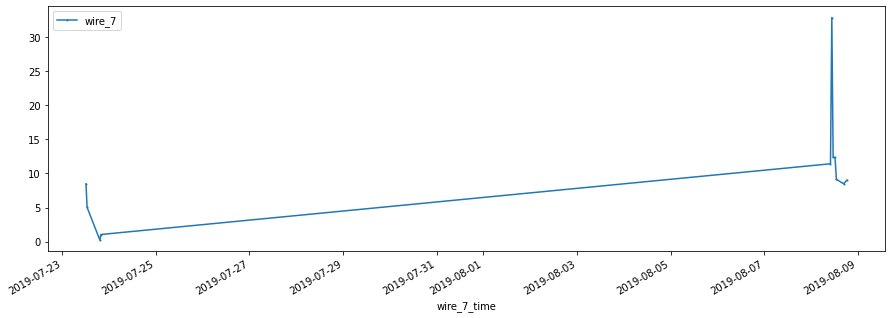

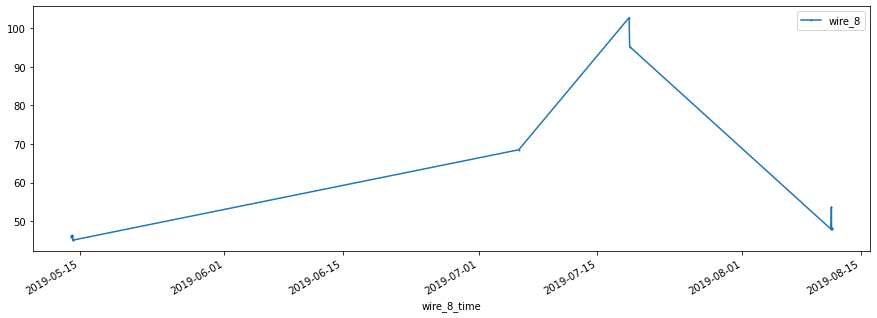

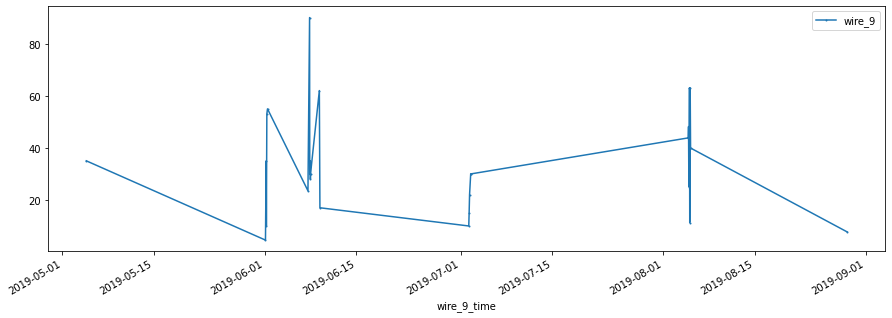

In [60]:
for i in range(len(df_wire.columns)):
    if i > 0:
        pd.merge(df_wire_time, df_wire, on='key', how='inner').plot(x='wire_' + str(i) + '_time', y='wire_' + str(i), marker='.', markersize=2, figsize=(15,5))
        plt.show()

In [61]:
df_wire_time = df_wire_time.fillna(pd.Timestamp('20000101'))
df_wire_time.head()

,key,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,2019-05-03 11:11:41,2000-01-01 00:00:00,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01
1,2,2019-05-03 11:46:10,2000-01-01 00:00:00,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01
2,3,2019-05-03 12:13:47,2000-01-01 00:00:00,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01
3,4,2019-05-03 12:48:05,2000-01-01 00:00:00,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01


## Исследовательский анализ данных и подготовка

<font color='DarkBlue'>
📌 После анализа исходных датасетов можно определить, что датасеты data_bulk_time и data_wire_time не имеют полезной информации. Финальный замер температуры как целевой признак не зависит от времени добавления присадок <br>
📌 Необходимо рассмотреть остальные признаки. В данных о продувке газом всего одно значащее поле, можно добавить его в финальный вариант исходной выборки для моделей <br>
📌 В таблицах, содержащих информацию об объеме добавленных примесей, содержится большое количество признаков. Сначала необходимо использовать все, затем выделить только значимые на данный момент, в дальнейшем можно будет пересмотреть их состав <br>
📌 Далее необходимо рассмотреть основную таблицу, поделенную на основную и финальную тестовую и содержащую информацию о температуре сырья. Необходимо выделить в качестве основных параметров по каждой партии начальное, конечное значения температуры (так как значения упорядочены можно использовать агрегаторы first и last) и длительность времени между первым и последним замерами <br>
</font> 

In [62]:
df_temp_agg = df_temp.groupby('key')[['Время замера','Температура']].agg({'Время замера': lambda x: x.max() - x.min(), 'Температура': ['first','last']})
df_temp_agg.columns = ['duration','temp_begin','temp_end']
df_temp_agg['duration'] = df_temp_agg['duration'].dt.total_seconds()
df_temp_final_test_agg = df_temp_final_test.groupby('key')[['Время замера','Температура']].agg({'Время замера': lambda x: x.max() - x.min(), 'Температура': 'first'})
df_temp_final_test_agg.columns = ['duration','temp_begin']
df_temp_final_test_agg['duration'] = df_temp_final_test_agg['duration'].dt.total_seconds()
display(df_temp_agg)
display(df_temp_final_test_agg)

,duration,temp_begin,temp_end
key,,,
1,861.0,1571.0,1613.0
2,1305.0,1581.0,1602.0
3,1300.0,1596.0,1599.0
4,388.0,1601.0,1625.0
5,762.0,1576.0,1602.0
...,...,...,...
2495,1137.0,1570.0,1591.0
2496,1618.0,1554.0,1591.0
2497,717.0,1571.0,1589.0


,duration,temp_begin
key,,
2500,1010.0,1539.0
2501,2792.0,1587.0
2502,1614.0,1583.0
2503,2129.0,1603.0
2504,1717.0,1583.0
...,...,...
3237,1299.0,1569.0
3238,749.0,1584.0
3239,3148.0,1598.0


<font color='DarkBlue'>
📌 Требуется отобразить корреляционные зависимости между выбранными параметрами для основной выборки <br>
</font> 

,duration,temp_begin,temp_end
duration,1.000000,0.148981,-0.005784
temp_begin,0.148981,1.000000,0.436705
temp_end,-0.005784,0.436705,1.000000


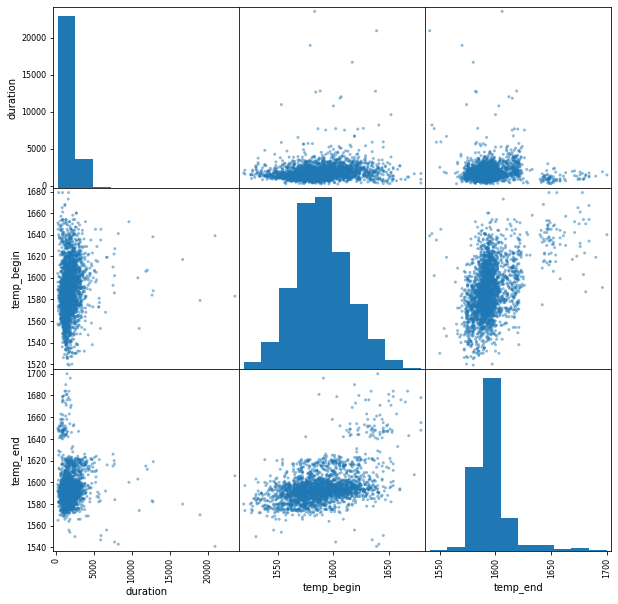

In [63]:
pd.plotting.scatter_matrix(df_temp_agg, figsize=(10,10))
display(df_temp_agg.select_dtypes(include=['bool','int','float']).corr())

<font color='DarkBlue'>
📌 Далее нужно выделить признаки из таблицы, содержащей данные о нагреве электродами: суммарное время нагрева электродами (сумма значений по всем промежуткам между запусками нагрева) и среднее соотношение потребления активной и реактивной мощности для каждой партии. И нужно определить корреляцию временного признака с остальными из исходной таблицы <br>
📌 Значения активной и реактивной мощности сильно коррелируются (матрица корреляций выведена выше), а их агрегация определит больший разброс, поэтому необходимо выбрать только один параметр. Лучшие результаты показывали модели, где одним из признаков являлось значение активной мощности. В текущей задаче она имеет основную ценность для определения температуры нагрева и определяет реактивную <br>
</font> 

In [64]:
# df_arc['work'] = ((df_arc['Активная мощность'] ** 2 + df_arc['Реактивная мощность'] ** 2) ** 0.5) * (df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']).dt.total_seconds()
# df_arc_agg = df_arc.groupby('key')['work'].sum()

In [65]:
#df_arc['power'] = ((df_arc['Активная мощность'] ** 2 + df_arc['Реактивная мощность'] ** 2) ** 0.5)
df_arc['heat_time'] = (df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']).dt.total_seconds()
df_arc['ratio'] = df_arc['Активная мощность']/df_arc['Реактивная мощность']
df_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,heat_time,ratio
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365.0,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0,1.671717
...,...,...,...,...,...,...,...
14867,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,157.0,1.505675
14868,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,180.0,1.292139
14869,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,184.0,1.542928
14870,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,57.0,1.514004


In [66]:
df_arc_agg = df_arc.groupby('key')[['Активная мощность', 'heat_time']].agg({'Активная мощность': 'sum', 'heat_time': 'sum'})
df_arc_agg = df_arc_agg.rename(columns={'Активная мощность':'power'})
df_arc_agg

,power,heat_time
key,,
1,4.878147,1098.0
2,3.052598,811.0
3,2.525882,655.0
4,3.209250,741.0
5,3.347173,869.0
...,...,...
3237,3.932467,909.0
3238,2.106529,546.0
3239,4.666754,1216.0


<font color='DarkBlue'>
📌 Необходимо обозначить корреляцию между выделенными параметрами <br>
</font> 

,power,heat_time
power,1.000000,0.978004
heat_time,0.978004,1.000000


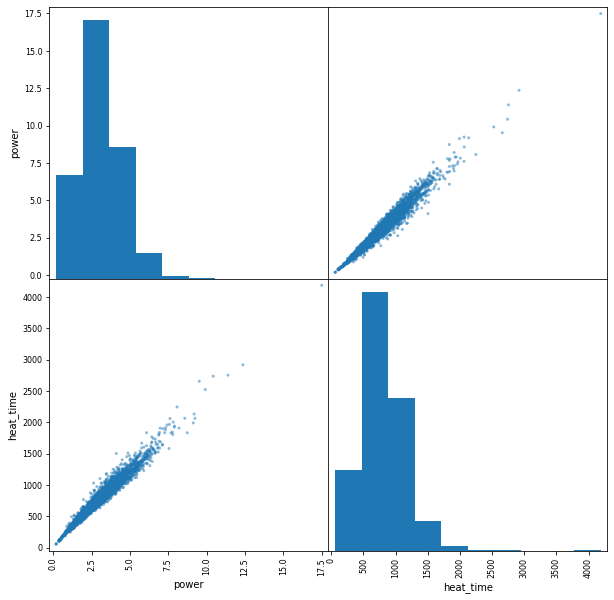

In [67]:
pd.plotting.scatter_matrix(df_arc_agg, figsize=(10,10))
display(df_arc_agg.select_dtypes(include=['bool','int','float']).corr())

<font color='DarkBlue'>
📌 Суммарное значение выбранной ранее активной мощности сильно коррелируется со временным интервалом нагрева, следовательно одновременное их использование в качестве признаков для основной выборки даст худший результат, как и агрегация общего значения <br>
📌 Также при отсутствии корреляции с остальными признаками можно было бы выделить в качестве признаков суммарное для каждой партии значение мощности (корень квадратный из суммы квадратов активной и реактивной) или работу (умножение предыдущей величины на суммарное время нагрева электродами). После выполнения всех указанных ниже операций по обучению моделей, используя указанные признаки в качестве основных, и сравнения результатов наиболее подходящим признаком для включения в основную выборку является только суммарное значение активной мощности для каждой партии <br>
</font> 

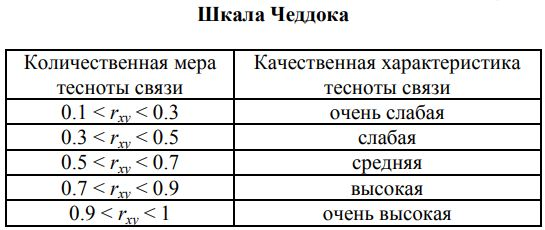

In [68]:
df_arc_agg = df_arc_agg['power']

<font color='DarkBlue'>
📌 Необходимо объединить обозначенные ранее таблицы по партиям, присутствующим во всех, и получить рабочую и финальную тестовую выборки для обучения моделей <br>
</font> 

In [69]:
df = pd.merge(df_arc_agg, df_gas, on='key', how='inner')
df = pd.merge(df, df_bulk, on='key', how='inner')
df = pd.merge(df, df_wire, on='key', how='inner')
df

,key,power,gas_1,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,4.878147,29.749986,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3.052598,12.555561,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2.525882,28.554793,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.209250,18.841219,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3.347173,5.413692,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,3237,3.932467,5.543905,0,0,170,0,0,0,0,0,0,0,0,252,0,130,206,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3017,3238,2.106529,6.745669,0,0,126,0,0,0,0,0,0,0,0,254,0,108,106,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3018,3239,4.666754,16.023518,0,0,0,0,0,114,0,0,0,0,0,158,0,270,88,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3019,3240,2.984083,11.863103,0,0,0,0,0,26,0,0,0,0,0,0,0,192,54,34.070400,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_final_test = pd.merge(df_temp_final_test_agg, df, on='key', how='inner')
df = pd.merge(df_temp_agg, df, on='key', how='inner')
display(df.head())
display(df_final_test.head())

,key,duration,temp_begin,temp_end,power,gas_1,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,861.0,1571.0,1613.0,4.878147,29.749986,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1305.0,1581.0,1602.0,3.052598,12.555561,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1300.0,1596.0,1599.0,2.525882,28.554793,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,388.0,1601.0,1625.0,3.209250,18.841219,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,762.0,1576.0,1602.0,3.347173,5.413692,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,duration,temp_begin,power,gas_1,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,2500,1010.0,1539.0,3.878814,9.990718,0,0,44,0,0,0,0,0,0,0,0,255,0,120,226,83.166710,61.224798,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2501,2792.0,1587.0,4.164288,13.828957,0,0,255,0,0,0,0,0,0,0,0,145,0,137,128,172.754410,198.452789,254.462219,0.0,0.0,0.0,0.0,0.0,0.0
2,2502,1614.0,1583.0,2.279659,13.890142,0,0,49,0,0,0,0,0,0,0,0,0,0,129,0,100.551354,160.330566,260.179932,0.0,0.0,0.0,0.0,0.0,0.0
3,2503,2129.0,1603.0,2.376678,7.219785,0,0,125,0,0,0,0,0,0,0,0,207,0,128,205,127.676638,47.351200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,2504,1717.0,1583.0,3.296629,9.362822,0,0,0,0,0,0,0,0,0,0,0,257,0,124,235,87.097924,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


<font color='DarkBlue'>
📌 Далее необходимо выполнить преобразование типов данных, если отсутствует необходимость в осуществлении арифметических операций между значениями датасетов <br>
</font> 

In [71]:
for i in [df, df_final_test]:
    i[i.select_dtypes(include=['int']).columns] = i.select_dtypes(include=['int']).apply(pd.to_numeric, downcast='unsigned')
    i[i.select_dtypes(include=['float']).columns] = i.select_dtypes(include=['float']).apply(pd.to_numeric, downcast='float')
    print('\033[1m\033[43m {}'.format('----- Просмотр общей информации dataframe -----'),'\033[0m')
    i.info()

 ----- Просмотр общей информации dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2324 non-null   uint16 
 1   duration    2324 non-null   float32
 2   temp_begin  2324 non-null   float32
 3   temp_end    2324 non-null   float32
 4   power       2324 non-null   float32
 5   gas_1       2324 non-null   float32
 6   bulk_1      2324 non-null   uint8  
 7   bulk_2      2324 non-null   uint16 
 8   bulk_3      2324 non-null   uint16 
 9   bulk_4      2324 non-null   uint16 
 10  bulk_5      2324 non-null   uint16 
 11  bulk_6      2324 non-null   uint16 
 12  bulk_7      2324 non-null   uint16 
 13  bulk_8      2324 non-null   uint8  
 14  bulk_9      2324 non-null   uint8  
 15  bulk_10     2324 non-null   uint8  
 16  bulk_11     2324 non-null   uint16 
 17  bulk_12     2324 non-null   uint16 
 18  bulk_13     2324 n

<font color='DarkBlue'>
📌 Требуется выполнить проверку основной выборки на мультиколлинеарность, используя коэффициент корреляции Пирсона, так как все ключенвые рассматриваемые данные из исходных таблиц 'data_arc' и 'data_temp' распределены нормально. Корреляция параметров в тестовой выборке аналогичная <br>
</font> 

In [72]:
display(df.corr())
display(df.corr().apply(lambda x: (x > 0.9) | (x < -0.9)))
print('Признаки, имеющие высокую степень корреляции с другими:\n', df.corr().apply(lambda x: (x > 0.9) | (x < -0.9)).sum()[df.corr().apply(lambda x: (x > 0.9) | (x < -0.9)).sum() > 1], sep='')

,key,duration,temp_begin,temp_end,power,gas_1,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
key,1.000000,-0.002161,-0.016279,-0.096408,-0.028098,-0.043089,-0.078030,-0.006134,-0.006001,-0.026251,0.035351,0.005363,0.052443,0.015523,-0.039675,0.063157,0.035133,0.026981,-0.015736,-0.110121,-0.044505,-0.013408,0.043647,-0.027178,0.049345,NaN,-0.008133,0.037057,-0.035952,0.021416
duration,-0.002161,1.000000,0.209594,0.097172,0.537964,0.454365,0.149987,0.250185,0.025655,0.000064,0.098603,0.149702,0.245361,-0.004677,-0.014628,0.000639,0.033923,0.220078,0.265955,0.185651,0.129788,0.164768,0.054235,0.084466,0.264204,NaN,0.136193,0.163799,-0.010657,0.009437
temp_begin,-0.016279,0.209594,1.000000,0.301882,-0.434320,0.036736,0.079098,0.141547,-0.113380,0.165484,0.078729,-0.127046,0.087774,-0.011742,-0.033394,0.035789,-0.110430,-0.079574,0.020237,-0.179991,-0.062382,0.262880,-0.101101,-0.003403,0.076126,NaN,0.020733,0.052812,-0.029831,0.002639
temp_end,-0.096408,0.097172,0.301882,1.000000,0.289748,0.059079,-0.075428,-0.082543,-0.037156,0.187817,-0.028446,-0.180906,-0.107371,-0.026613,-0.016130,0.061227,-0.114936,0.266805,-0.010974,0.114893,0.265772,0.317488,-0.207242,-0.047636,-0.159839,NaN,-0.084149,-0.137349,-0.010818,-0.027561
power,-0.028098,0.537964,-0.434320,0.289748,1.000000,0.373602,0.084251,0.031006,0.111702,-0.031826,0.006331,0.154173,0.074408,-0.011448,0.023647,0.004393,0.070966,0.477377,0.122479,0.465022,0.333227,0.050949,0.054590,0.035491,0.047591,NaN,0.053222,0.019621,0.029413,-0.016329
gas_1,-0.043089,0.454365,0.036736,0.059079,0.373602,1.000000,0.234089,0.217443,0.059665,0.017532,0.086869,0.139574,0.198338,0.004119,0.116576,-0.008634,0.041945,0.216969,0.049033,0.268284,0.043033,0.118192,0.104653,0.103356,0.145424,NaN,0.108065,0.078961,0.118068,0.014027
bulk_1,-0.078030,0.149987,0.079098,-0.075428,0.084251,0.234089,1.000000,0.224677,-0.011538,0.041662,0.060365,-0.003581,0.237195,-0.005737,-0.019800,-0.023333,-0.038008,0.325724,-0.010325,0.207606,-0.001211,0.013823,-0.009261,0.020204,0.146276,NaN,0.148509,0.083432,-0.019579,0.011013
bulk_2,-0.006134,0.250185,0.141547,-0.082543,0.031006,0.217443,0.224677,1.000000,-0.046953,0.040756,0.360291,-0.030001,0.679352,-0.001549,-0.005344,-0.018055,0.001449,-0.099125,-0.005604,-0.141185,-0.105898,-0.169623,-0.039080,0.223188,0.699339,NaN,0.558882,0.431735,-0.005285,-0.006857
bulk_3,-0.006001,0.025655,-0.113380,-0.037156,0.111702,0.059665,-0.011538,-0.046953,1.000000,-0.295526,-0.006766,0.066316,-0.033521,0.020875,0.011390,-0.085266,-0.007383,0.018059,-0.013385,0.011209,-0.013181,0.037788,0.094897,0.005840,-0.040582,NaN,0.007174,-0.019475,0.004885,0.004668
bulk_4,-0.026251,0.000064,0.165484,0.187817,-0.031826,0.017532,0.041662,0.040756,-0.295526,1.000000,0.028273,-0.251577,0.045866,-0.013209,-0.002995,-0.084975,-0.119733,0.105190,0.003154,-0.091103,0.100833,0.298145,-0.268115,-0.039326,0.034390,NaN,-0.011507,0.033822,0.007781,-0.058236


,key,duration,temp_begin,temp_end,power,gas_1,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
key,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
duration,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
temp_begin,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
temp_end,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
power,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
gas_1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bulk_1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bulk_2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bulk_3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bulk_4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Признаки, имеющие высокую степень корреляции с другими:
bulk_9    2
wire_8    2
dtype: int64


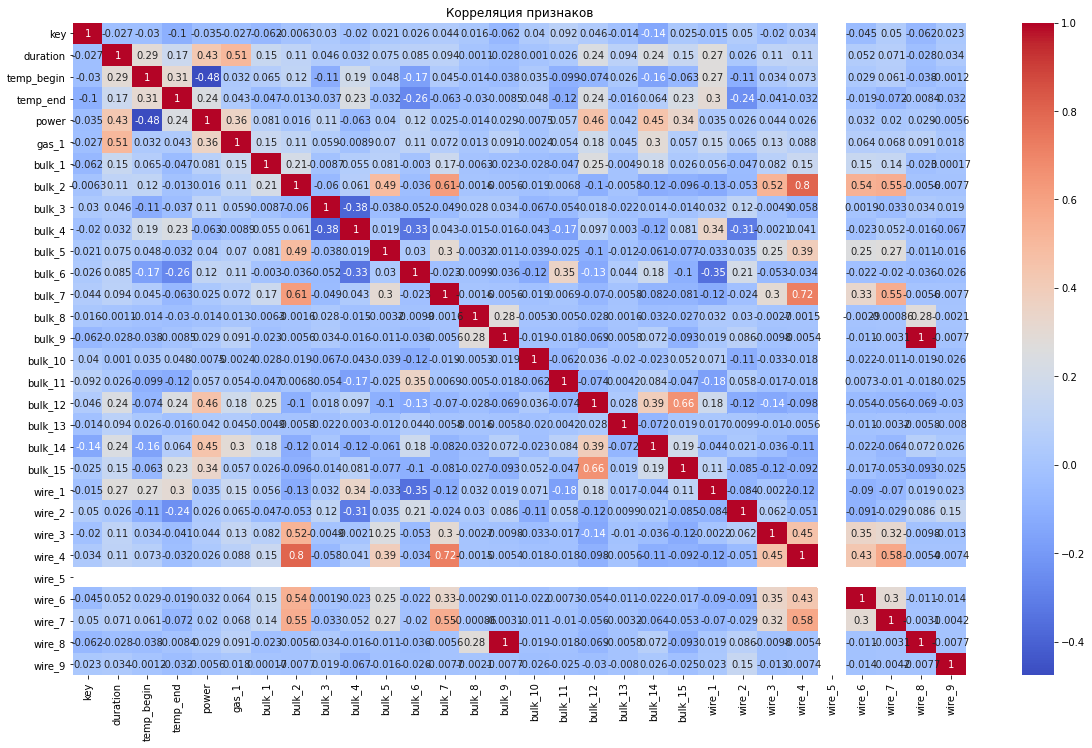

In [73]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(df.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

<font color='DarkBlue'>
📌 Явно коррелирующие признаки отсутствуют, кроме некоторых примесей. Наблюдается высокое значение корреляции между признаками по объему присадок 'bulk_9' и 'wire_8', но это скорее исключение, так как плотность значений очень мала. Доступных для сравнения данных мало (по 19), но для текущей задачи рекомендуется удалить один из них <br>
📌 Далее необходимо удалить неинформативный столбец с индикаторами партий, выделив его из тестовой выборки в отдельный массив для сравнения с полученными предсказаниями <br>
</font> 

In [74]:
df = df.drop(['key', 'wire_8'], axis=1)
df_key_value = df_final_test['key']
df_final_test = df_final_test.drop(['key', 'wire_8'], axis=1)

<font color='DarkBlue'>
📌 Из основной выборки, имеющей все значения целевого признака, необходимо выделить датасеты с общими признаками и целевым <br>
📌 Нужно разбить полученные выборки на обучающие и тестовые в стандартной пропорции 3 к 1 <br>    
📌 В выборках присутствуют только количественные признаки, поэтому необходимость в их кодировании отпадает <br>
</font> 

In [75]:
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df.drop('temp_end', axis=1), df.temp_end, test_size=0.25, random_state=3102022)
df_features_final_test = df_final_test.copy()
print('Размер df_features_train:', df_features_train.shape)
print('Размер df_features_test:', df_features_test.shape)
print('Размер df_target_train:', df_target_train.shape)
print('Размер df_target_test:', df_target_test.shape)

Размер df_features_train: (1743, 27)
Размер df_features_test: (581, 27)
Размер df_target_train: (1743,)
Размер df_target_test: (581,)


In [1]:
1743+581

2324

In [76]:
df

,duration,temp_begin,temp_end,power,gas_1,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_9
0,861.0,1571.0,1613.0,4.878147,29.749987,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,1305.0,1581.0,1602.0,3.052598,12.555561,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,1300.0,1596.0,1599.0,2.525882,28.554792,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153,91.160156,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,388.0,1601.0,1625.0,3.209250,18.841219,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,762.0,1576.0,1602.0,3.347173,5.413692,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152,89.238235,9.11456,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,1137.0,1570.0,1591.0,3.210690,7.125735,0,0,21,0,0,0,0,0,0,90,0,256,0,129,223,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2320,1618.0,1554.0,1591.0,4.203064,9.412616,0,0,0,63,0,0,0,0,0,122,0,256,0,129,226,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2321,717.0,1571.0,1589.0,2.212379,6.271699,0,0,0,85,0,0,0,0,0,0,0,230,0,124,226,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0
2322,1302.0,1591.0,1594.0,3.408726,14.953657,0,0,90,0,0,0,0,0,0,101,0,206,0,129,207,118.110718,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df_features_train

,duration,temp_begin,power,gas_1,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_9
32,2532.0,1564.0,5.546488,14.311244,0,0,44,116,0,0,0,0,0,0,0,459,0,262,154,210.275513,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0000
722,1946.0,1589.0,4.111069,10.300523,0,0,0,72,0,0,0,0,0,0,0,204,0,106,202,160.664398,30.280640,0.000000,0.000000,0.0,0.00000,0.0,0.0000
1520,557.0,1585.0,1.728610,3.706550,0,0,60,0,0,0,0,0,0,0,0,305,0,130,204,77.032799,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0000
2313,2115.0,1602.0,1.844930,28.306154,0,0,23,0,0,0,0,0,0,0,0,157,0,140,105,13.104000,37.066639,0.000000,0.000000,0.0,0.00000,0.0,0.0000
1904,1494.0,1568.0,3.346087,6.737862,0,0,0,0,0,84,0,0,0,0,0,162,0,107,206,21.053761,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1276.0,1564.0,2.976828,5.557812,0,0,83,0,0,0,0,0,0,0,0,256,0,129,203,101.087997,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0000
1970,6658.0,1619.0,3.171603,17.790213,34,258,0,99,132,0,553,0,0,0,0,0,0,0,0,7.032480,0.000000,93.117027,43.244244,0.0,73.17025,0.0,0.0000
1571,1347.0,1574.0,2.864358,7.740282,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,147.092407,142.958405,0.000000,0.000000,0.0,0.00000,0.0,30.1028
1153,1363.0,1591.0,2.570598,10.245993,0,0,0,104,0,0,0,0,0,0,0,0,0,107,0,134.175598,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0000


<font color='DarkBlue'>
📌 Одной из промежуточных задач для изучения характеристик процесса обработки стали является создание таблицы с агрегированными для каждого значения столбца 'key' параметрами:
    
- длительность времени между первым и последним замером температуры;
- суммарное время нагрева электродами, то есть сумма значений по всем промежуткам между запусками нагрева электродов;
- количество запусков нагрева электродами;
- среднее соотношение потребления активной и реактивной мощности    
</font>

In [78]:
df_task = pd.concat((df_temp_agg['duration'], df_temp_final_test_agg['duration']))
df_task = pd.merge(df_task, df_arc.groupby('key')['heat_time'].sum(), on='key', how='inner')
df_task = pd.merge(df_task, df_arc.groupby('key')['heat_time'].count(), on='key', how='inner', suffixes=('', '_cnt'))
df_task = pd.merge(df_task, df_arc.groupby('key')['ratio'].mean(), on='key', how='inner')
df_task

,duration,heat_time,heat_time_cnt,ratio
key,,,,
1,861.0,1098.0,5,1.538898
2,1305.0,811.0,4,1.551834
3,1300.0,655.0,5,1.583120
4,388.0,741.0,4,1.563487
5,762.0,869.0,4,1.480428
...,...,...,...,...
3237,1299.0,909.0,5,1.384203
3238,749.0,546.0,3,1.257794
3239,3148.0,1216.0,8,1.497918


<font color='DarkBlue'>
📌 По всем полученным столбцам также требуется вычислить статистики: средние, минимальные и максимальные значения, медианы и величины 25%- и 75%-квартилей 
</font>

In [79]:
df_task.describe()

,duration,heat_time,heat_time_cnt,ratio
count,3207.000000,3207.000000,3207.000000,3207.000000
mean,1841.071718,794.721235,4.628937,1.357512
std,1247.596297,332.329143,1.608853,0.132853
min,197.000000,57.000000,1.000000,0.676106
25%,1177.500000,571.000000,4.000000,1.292903
50%,1581.000000,770.000000,4.000000,1.370609
75%,2235.000000,983.000000,6.000000,1.438307
max,23537.000000,4189.000000,16.000000,1.782164


<font color='DarkBlue'>
📌 Уточняющие вопросы для тимлида:

- какой признак в поставленной задаче является целевым - необходимо предсказать температуру стали на каком этапе;
- какие признаки необходимо выделить для выборки, используемой в обучении моделей;
- необходимо указать единицы измерения всех параметров в исходных датасетах;
- необходимо обозначить нормальный диапазон вхождения значений всех полей в исходных датасетах для определения выбросов;
- может ли осуществляться технологический процесс для нескольких партий одновременно

📌 Примерный план решения задачи:

- изучить и визуализировать исходные данные, удалить дубликаты, заполнить пропуски или удалить соответствующие записи, выявить аномалии и заменить подходящими значениями или удалить;
- создать выборку для работы с моделями, выделив необходимые признаки, и преобразовать типы данных;
- составить датасет по задаче из платформы 'eduflow';
- выявить наиболее важные признаки, обучить несколько моделей и выбрать лучшую в соответствии с метрикой MAE;
- предсказать целевой признак для тестовой выборки, выделенной из исходной, состоящей из объектов с пропущенными значениями целевого признака
</font>

#### План работы:  
- Провести исследовательский анализ данных:
    - Посмотреть на распределение исходных данных
    - Проанализировать порядок событий в производственном процессе
    - ....
- Подобрать признаки, на которых будет обучаться модель:
    - Сгенерировать ряд признаков
    - Проверить признаки на мультиколлинеарность, исключить лишние
    - Провести масштабирование признаков (если надо)
- Построить модель, которая предскажет температуру стали:
    - Сформировать обучающую, валидационную и тестовую выборки
    - Выбрать несколько моделей и проверить их эффективность на валидационной выборке с помощью показателя эффективности MAE
    - Эффективность лучшей модели проверить на тестовой выборке

## Обучение и анализ моделей

<font color='DarkBlue'>
📌 Сначала рекомендуется выделить отдельную функцию для обучения моделей с перекрестной проверкой в соответствии с выбранным алгоритмом и выбора наилучшей по указанной метрике. Также можно выделить основные метрики для выбранной модели и визуализировать распределение целевого признака <br>
</font> 

In [80]:
def fit_predict(model, gs, cv=2):  
# Определение лучших гиперпараметров модели    
    if gs == True:
        grid.fit(df_features_train, df_target_train)
        # print('Лучшая модель по MAE (усредненной по CV):', grid.best_estimator_)
        print('Параметры лучшей модели по MAE (усредненной по CV):', grid.best_params_) 
        # display(pd.DataFrame(grid.cv_results_))
        mae_train = abs(grid.best_score_)   
        # print('Лучшая метрика RMSE:', (abs(grid.cv_results_['mean_test_neg_mean_squared_error']) ** 0.5).min())
        rmse_train = abs(grid.cv_results_['mean_test_neg_mean_squared_error'][grid.best_index_]) ** 0.5
        # print('Лучшая метрика R2:', grid.cv_results_['mean_test_r2'].max())
        r2_train = grid.cv_results_['mean_test_r2'][grid.best_index_]
        model = grid.best_estimator_
    else:
        mae_train = abs(cross_val_score(model, df_features_train, df_target_train, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv).mean())
        rmse_train = abs(cross_val_score(model, df_features_train, df_target_train, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv).mean()) ** 0.5
        r2_train = cross_val_score(model, df_features_train, df_target_train, scoring='r2', n_jobs=-1, cv=cv).mean() 
    print('Усредненная по CV лучшая метрика MAE:', mae_train)
    print('Усредненная по CV метрика RMSE модели:', rmse_train)
    print('Усредненная по CV метрика R2 модели:', r2_train)
    start_time = time.time()
    model.fit(df_features_train, df_target_train)
    t_train = round((time.time() - start_time) * 1000)
    print('Время обучения:', t_train, 'ms')
# Предсказание на тестовой выборке    
    start_time = time.time()
    df_predicted_test = model.predict(df_features_test)
    t_predict = round((time.time() - start_time) * 1000)
    print('Время предсказания:', t_predict, 'ms')
    mean = df_predicted_test.mean()
    print('Среднее значение предсказания:', mean)
#     mae_test = mean_absolute_error(df_target_test, df_predicted_test)
#     rmse_test = mean_squared_error(df_target_test, df_predicted_test) ** 0.5
    r2_test = model.score(df_features_test, df_target_test)
#     print('Метрика MAE на тестовой выборке:', mae_test)
#     print('Метрика RMSE на тестовой выборке:', rmse_test)
    print('Метрика R2 на тестовой выборке:', r2_test)
# Построение гистограмм распределения целевого признака
    df_predicted_train = model.predict(df_features_train)
    pd.Series(df_target_train).hist(bins=100, label='Фактические значения обучающей выборки', alpha=0.5, figsize = (15,5))
    pd.Series(df_predicted_train).hist(bins=np.linspace(df_target_train.min(), df_target_train.max(), num=101), label='Предсказания на обучающей выборке', alpha=0.5, figsize = (15,5))
#     pd.Series(df_target_test).hist(bins=np.linspace(df_target_test.min(), df_target_test.max(), num=101), label='Фактические значения тестовой выборки', alpha=0.5, figsize = (15,5))
#     pd.Series(df_predicted_test).hist(bins=np.linspace(df_target_test.min(), df_target_test.max(), num=101), label='Предсказания на тестовой выборке', alpha=0.5, figsize = (15,5))
    plt.legend()
    plt.show()  
    return model, mae_train, rmse_train, r2_train, r2_test, mean, t_train, t_predict

<font color='DarkBlue'>
📌 Далее рекомендуется создать таблицу для сохранения наилучших результатов по моделям машинного обучения <br>
</font>

In [81]:
final_table = pd.DataFrame(columns = ['name', 'mae_train', 'rmse_train', 'r2_train', 'r2_test', 'mean', 't_train', 't_predict'])

<font color='DarkBlue'>
📌 Требуется выполнить необходимые преобразования исходных выборок для использования в обучении алгоритмами полиномиальной регрессии: стандартизировать имеющиеся признаки <br>
</font> 

In [82]:
numeric = df_features_train.select_dtypes(include=['uint8', 'uint16', 'float32']).columns
scaler = StandardScaler()
scaler.fit(df_features_train[numeric]) 
df_features_train[numeric] = scaler.transform(df_features_train[numeric])
df_features_test[numeric] = scaler.transform(df_features_test[numeric])
df_features_final_test[numeric] = scaler.transform(df_features_final_test[numeric])

<font color='DarkBlue'>
📌 Теперь необходимо обучить модель с использованием алгоритма LinearRegression <br>
</font>

Усредненная по CV лучшая метрика MAE: 5.671472038389086
Усредненная по CV метрика RMSE модели: 7.539363083990719
Усредненная по CV метрика R2 модели: 0.5567997723378635
Время обучения: 95 ms
Время предсказания: 4 ms
Среднее значение предсказания: 1593.2590987967988
Метрика R2 на тестовой выборке: 0.5471350378067756


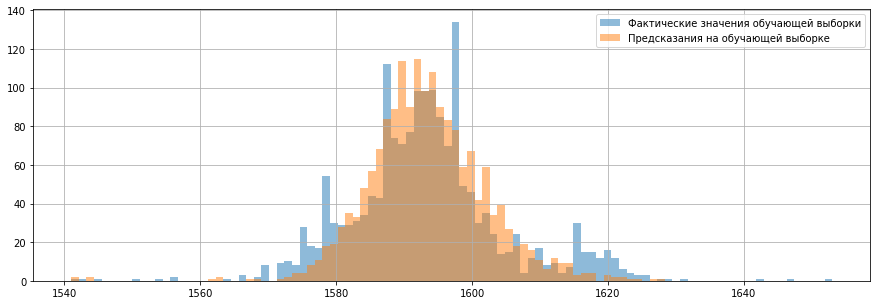

In [83]:
model = LinearRegression(n_jobs=-1)
model, mae_train, rmse_train, r2_train, r2_test, mean, t_train, t_predict = fit_predict(model, False, 5)
final_table = final_table.append({'name': 'LinearRegression', 'mae_train': mae_train, 'rmse_train': rmse_train, 'r2_train': r2_train, 'r2_test': r2_test, 'mean': mean, 't_train': t_train, 't_predict': t_predict}, ignore_index=True)

<font color='DarkBlue'>
📌 На основе отображенной информации можно обозначить следующие выводы:  
    
- значения метрик достаточно высокие, время обучения и предсказания относительно небольшое, следует учесть, что в отсутствии необходимости не осуществлялся перебор по гиперпараметрам;
- модель не переобучена, исходя из небольшой разницы между значениями R2 для обучающей и тестовой выборок, объемная кроссвалидация частично устраняет подобную возможность, дополнительно можно использовать алгоритмы Ridge и Lasso для обеспечения регуляризации;
- коэффициент детерминации достаточно высокий, больше 0, соответственно, проверка модели на адекватность пройдена;
- гистограммы визуально слабо различаются, на всем интервале заментна стабильная небольшая разница между фактическими значениями и предсказанными, для более подробного анализа необходимо изучить результаты обучения модели по исходной выборке другими алгоритмами
    
📌 Далее можно обучить модель алгоритмом Ridge, использующим L2 регуляризацию. Необходимость в подборе гиперпараметров отсутствует: параметр solver, как и остальные, кроме alpha, имеет минимальное влияние на результат. Чем меньше параметр alpha, тем лучше значения метрик на обучающей выборке, но при увеличении вероятность переобучения уменьшается, статистики на тестовой выборке предполагаются наиболее близкими к таковым на обучающей <br>  
</font>

Усредненная по CV лучшая метрика MAE: 5.67144206573493
Усредненная по CV метрика RMSE модели: 7.539265800762448
Усредненная по CV метрика R2 модели: 0.5568077615387342
Время обучения: 4 ms
Время предсказания: 2 ms
Среднее значение предсказания: 1593.2591519373577
Метрика R2 на тестовой выборке: 0.5471256255265635


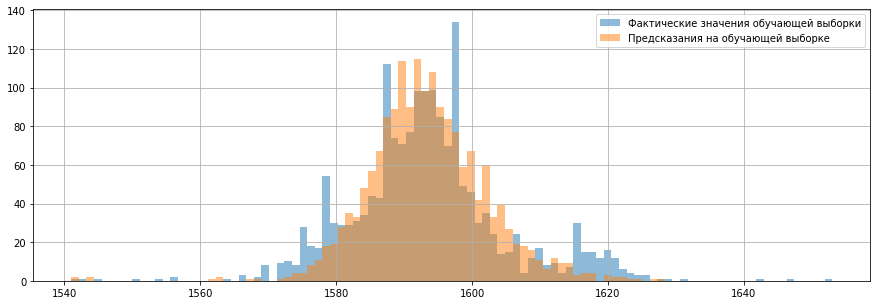

In [84]:
model = Ridge(alpha=0.1, random_state=3102022)
model, mae_train, rmse_train, r2_train, r2_test, mean, t_train, t_predict = fit_predict(model, False, 5)
final_table = final_table.append({'name': 'Ridge', 'mae_train': mae_train, 'rmse_train': rmse_train, 'r2_train': r2_train, 'r2_test': r2_test, 'mean': mean, 't_train': t_train, 't_predict': t_predict}, ignore_index=True)

<font color='DarkBlue'>
📌 На основе отображенной информации можно обозначить следующие выводы:  
    
- значения метрик идентичны в соответствии с моделью, указанная регуляризация не имеет влияния;
- время обучения и предсказания модели приблизительно соответствуют таковой у предыдущей
    
📌 Далее можно обучить модель алгоритмом Lasso, использующий L1 регуляризацию. Необходимость в подборе гиперпараметров также отсутствует <br>  
</font>

Усредненная по CV лучшая метрика MAE: 5.668312601069446
Усредненная по CV метрика RMSE модели: 7.511651565644198
Усредненная по CV метрика R2 модели: 0.5599097488459657
Время обучения: 94 ms
Время предсказания: 3 ms
Среднее значение предсказания: 1593.2490168348602
Метрика R2 на тестовой выборке: 0.5482572920184934


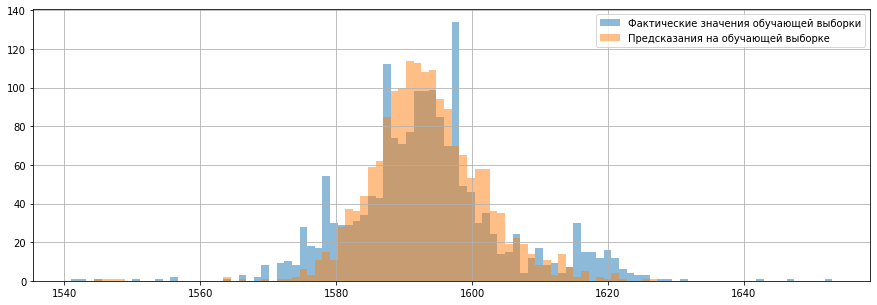

In [85]:
model = Lasso(alpha=0.1, random_state=3102022)
model, mae_train, rmse_train, r2_train, r2_test, mean, t_train, t_predict = fit_predict(model, False, 5)
final_table = final_table.append({'name': 'Lasso', 'mae_train': mae_train, 'rmse_train': rmse_train, 'r2_train': r2_train, 'r2_test': r2_test, 'mean': mean, 't_train': t_train, 't_predict': t_predict}, ignore_index=True)

<font color='DarkBlue'>
📌 На основе указанной информации можно обозначить следующие выводы:  
    
- значения метрик немного лучше по отношению к предыдущим моделям, разница несущественна;
- время обучения и предсказания модели аналогично модели, обученной стандартным алгоритмом линейной регрессии;
- гисторгаммы предсказаний всех моделей, обученных алгоритмами полиномиальной регрессии, почти идентичны
  
📌 Для обучения модели с использованием алгоритмов, использующих решающие деревья, предполагается замена тренировочных и тестовых выборок без создания новых переменных в целях оптимизации производительности выполнения вычислительных процессов, так как отсутствует необходимость в стандартизации признаков. Желательно использовать подбор гиперпараметров <br>
</font>

In [86]:
df_features_train, df_features_test = train_test_split(df.drop('temp_end', axis=1), test_size=0.25, random_state=3102022)
df_features_final_test = df_final_test.copy()

Параметры лучшей модели по MAE (усредненной по CV): {'max_depth': 12, 'n_estimators': 1501}
Усредненная по CV лучшая метрика MAE: 5.862631909631373
Усредненная по CV метрика RMSE модели: 8.132222540153892
Усредненная по CV метрика R2 модели: 0.48573811789430393
Время обучения: 13889 ms
Время предсказания: 321 ms
Среднее значение предсказания: 1593.5253534025446
Метрика R2 на тестовой выборке: 0.5250169646262913


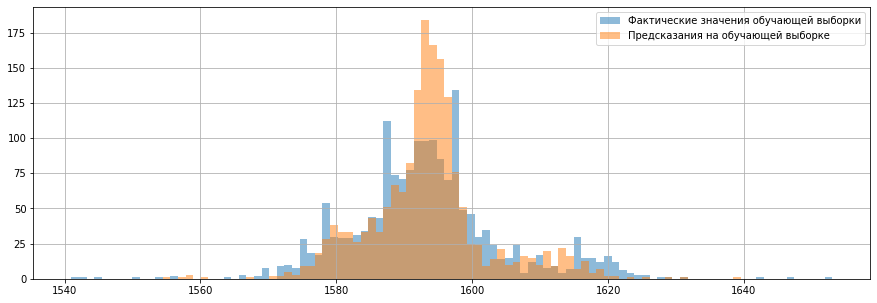

In [87]:
model = RandomForestRegressor(n_jobs=-1, random_state=3102022)
parameters = {'n_estimators': range (1001, 2001, 500), 'max_depth': range (6, 15, 3)}
grid = GridSearchCV(model, parameters, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], refit='neg_mean_absolute_error', n_jobs=-1, cv=5)
model, mae_train, rmse_train, r2_train, r2_test, mean, t_train, t_predict = fit_predict(model, True)
final_table = final_table.append({'name': 'RandomForestRegressor', 'mae_train': mae_train, 'rmse_train': rmse_train, 'r2_train': r2_train, 'r2_test': r2_test, 'mean': mean, 't_train': t_train, 't_predict': t_predict}, ignore_index=True)

<font color='DarkBlue'>
📌 На основе отображенной информации можно обозначить следующие выводы:  
    
- значения основных метрик хуже, чем у предыдущих моделей;
- время обучения и предсказания модели достаточно высокое, и в целом осуществлялся перебор по гиперпараметрам, поэтому время обучения всех вариантов моделей значительное;
- коэффициент детерминации больше 0, как и у всех остальных, соответственно, модель адекватна;
- модель по прежнему не переобучена;
- гистограммы визуально несильно различаются, но заметна пиковая концентрация значений около величины математического ожидания, что отличает модель от основанных на алгоритмах полиномиальной регрессии
    
📌 Можно обучить модель алгоритмом CatBoostRegressor, использующим метод градиентного бустинга. Также желательно реализовать подбор гиперпараметров <br>  
</font>

In [88]:
# model = LGBMRegressor(n_jobs=-1, random_state=3102022)
# parameters = {'n_estimators': range (1001, 2001, 500), 'max_depth': range (6, 15, 3)}
# # 'num_leaves': range (12, 30, 6)
# # 'boosting_type': ['gbdt', 'rf', 'dart', 'goss']
# # 'learning_rate': [0.1, 0.5]
# grid = GridSearchCV(model, parameters, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], refit='neg_mean_absolute_error', n_jobs=-1, cv=5)
# model, mae_train, mae_test, rmse_train, rmse_test, r2_train, r2_test, mean, t_train, t_predict = fit_predict(model, True)
# final_table = final_table.append({'name': 'LGBMRegressor', 'mae_train': mae_train, 'mae_test': mae_test, 'rmse_train': rmse_train, 'rmse_test': rmse_test, 'r2_train': r2_train, 'r2_test': r2_test, 'mean': mean, 't_train': t_train, 't_predict': t_predict}, ignore_index=True)

Параметры лучшей модели по MAE (усредненной по CV): {'max_depth': 6, 'n_estimators': 1501}
Усредненная по CV лучшая метрика MAE: 5.567337838724596
Усредненная по CV метрика RMSE модели: 7.948885774773082
Усредненная по CV метрика R2 модели: 0.5097030962153718
Время обучения: 6058 ms
Время предсказания: 3 ms
Среднее значение предсказания: 1592.9094368789683
Метрика R2 на тестовой выборке: 0.5500116688661253


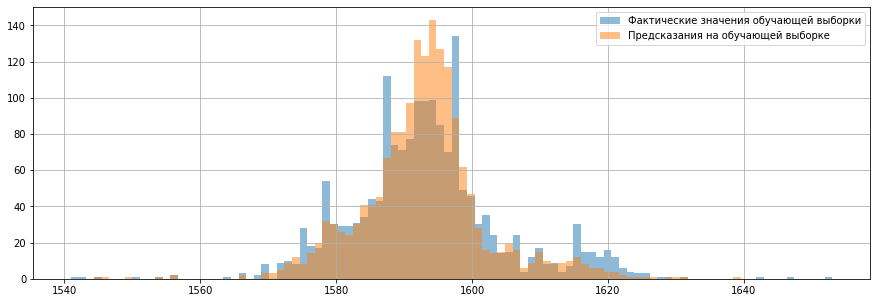

In [89]:
model = CatBoostRegressor(loss_function='MAE', random_state=3102022, verbose=0)
parameters = {'n_estimators': range (1001, 2001, 500), 'max_depth': range (6, 15, 3)}
# 'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
# 'bootstrap_type': ['Bayesian', 'MVS', 'Poisson', 'No']
# 'boosting_type': ['Ordered', 'Plain']
# 'learning_rate': [0.1, 0.5]
grid = GridSearchCV(model, parameters, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], refit='neg_mean_absolute_error', n_jobs=-1, cv=5)
model, mae_train, rmse_train, r2_train, r2_test, mean, t_train, t_predict = fit_predict(model, True)
final_table = final_table.append({'name': 'CatBoostRegressor', 'mae_train': mae_train, 'rmse_train': rmse_train, 'r2_train': r2_train, 'r2_test': r2_test, 'mean': mean, 't_train': t_train, 't_predict': t_predict}, ignore_index=True)

<font color='DarkBlue'>
📌 На основе предоставленной информации определены следующие выводы:  
    
- значения основных метрик сопоставимы с таковыми у других моделей, хуже,чем у обученных алгоритмами полиномиальной регрессии и лучше, чем у случайного леса, но величина MAE, указанная в качестве решающей, намного лучше остальных;
- время обучения наилучшей модели оптимально высокое, время предсказания низкое, но подбор гиперпараметров использовал значительное количество времени, так как для данной модели при больших значениях параметра 'max_depth' сильно увеличивается время обучения;
- коэффициент детерминации положителен, факт переобучения не выявлен;
- гистограммы визуально различаются почти так же, как на предыдущей модели, немного слабее
    
📌 Теперь можно указать на экране таблицу с основными метриками наилучших моделей, обученных используемыми алгоритмами <br>  
</font>

In [90]:
print('Среднее значение целевого признака на тестовой выборке:', df_target_test.mean())
final_table

Среднее значение целевого признака на тестовой выборке: 1593.2548


,name,mae_train,rmse_train,r2_train,r2_test,mean,t_train,t_predict
0,LinearRegression,5.671472,7.539363,0.556800,0.547135,1593.259099,95,4
1,Ridge,5.671442,7.539266,0.556808,0.547126,1593.259152,4,2
2,Lasso,5.668313,7.511652,0.559910,0.548257,1593.249017,94,3
3,RandomForestRegressor,5.862632,8.132223,0.485738,0.525017,1593.525353,13889,321
4,CatBoostRegressor,5.567338,7.948886,0.509703,0.550012,1592.909437,6058,3


<font color='DarkBlue'> 
📌 Исходя из приведенных данных можно обозначить следующие выводы:
    
- модель CatBoostRegressor имеет лучшее качество предсказания в соответствии с ключевой метрикой и имеет неплохие значения остальных, но время обучения достаточно большое, особенно при высоких значениях 'max_depth', что может являться критичным фактором для ввода в production, также согласно распределению признака на гистограмме модель больше необходимого предсказывает наиболее частые значения;
- метрики, полученные после обучения модели стандартным алгоритмом случайного леса, хуже, чем у модели, обученной методом градиентного бустинга, также выделяется большее время обучения и предсказания, модель имеет похожую гистограмму распределения целевого признака, алгоритм LGBMRegressor отличается очень долгим временем обучения, поэтому не обозначен в текущем проекте;
- модели полиномиальной регрессии достаточно хороши и имеют малое значение времени обучения и предсказания, чем определяется удобство пользования моделями и значительно облегчает также реализацию процесса переобучения модели, гистограммы фактических значений и предсказаний наиболее точно соответствуют на общем интервале значений, среднее значение целевого признака точно соотносится с предсказанным;
- среди моделей полиномиальной регрессии наиболее удобной является обученная алгоритмом Lasso, отличающаяся очень низким временем выполнения операций обучения и предсказания и одними из лучших значениями метрик

📌 В случае наивысшего приоритета по качеству обучения относительно ключевой метрики предлагается выбрать алгоритм CatBoost. Если время обучения имеет более высокую важность, рекомендуется для использования выбрать алгоритмы полиномиальной регрессии. Также гистограмма предсказаний данных моделей распределена более равномерно. Выбор алгоритма Lasso в данном проекте является наиболее подходящим <br>
📌 Теперь необходимо предварительно обучить модель, используя созданную функцию, и затем выделить наиболее значимые признаки. Для этого в случае использования указанного алгоритма требуется заново осуществить масштабирование признаков <br>
</font> 

In [91]:
numeric = df_features_train.select_dtypes(include=['uint8', 'uint16', 'float32']).columns
scaler = StandardScaler()
scaler.fit(df_features_train[numeric]) 
df_features_train[numeric] = scaler.transform(df_features_train[numeric])
df_features_test[numeric] = scaler.transform(df_features_test[numeric])
df_features_final_test[numeric] = scaler.transform(df_features_final_test[numeric])

Усредненная по CV лучшая метрика MAE: 5.668312601069446
Усредненная по CV метрика RMSE модели: 7.511651565644198
Усредненная по CV метрика R2 модели: 0.5599097488459657
Время обучения: 96 ms
Время предсказания: 94 ms
Среднее значение предсказания: 1593.2490168348602
Метрика R2 на тестовой выборке: 0.5482572920184934


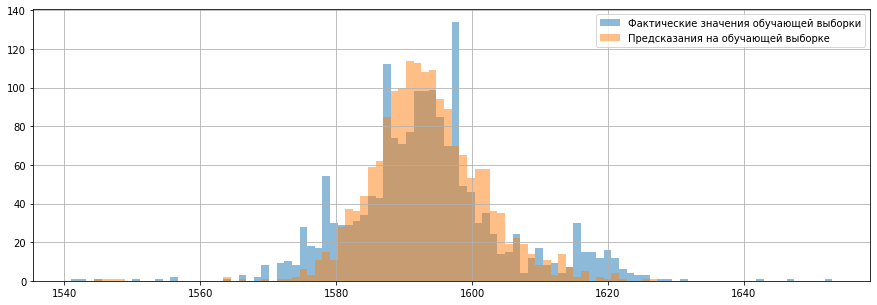

In [110]:
model = Lasso(alpha=0.1, random_state=3102022)
fit_predict(model, False, 5)
print('')

<font color='DarkBlue'>
📌 Необходимо проанализировать основные статистики признаков в указанных сериях <br>
</font>

In [93]:
print('-----Обучающая выборка-----')
display(df_target_train.describe())
print('-----Тестовая выборка-----')
display(df_target_test.describe())

-----Обучающая выборка-----


count    1743.000000
mean     1593.411987
std        11.355649
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1598.000000
max      1653.000000
Name: temp_end, dtype: float64

-----Тестовая выборка-----


count     581.000000
mean     1593.254761
std        10.759302
min      1547.000000
25%      1588.000000
50%      1592.000000
75%      1598.000000
max      1633.000000
Name: temp_end, dtype: float64

<font color='DarkBlue'>
📌 Стандартное отклонение на тестовой выборке ниже, соответственно возможно, что на ней модель может показывать наиболее точные значения признака. Также нужно рассмотреть статистики наиболее важных общих признаков <br>
📌 Необходимо отобразить на графике меры важности всех признаков по обучающей выборке, как на наиболее полной <br>
</font>

In [111]:
importances = permutation_importance(model, df_features_train, df_target_train, n_repeats=10, n_jobs=-1, random_state=3102022)
importances.importances_mean

array([5.16165021e-01, 1.11617637e+00, 1.65607787e+00, 3.13261946e-03,
       1.86503246e-02, 6.49319479e-03, 2.12243867e-03, 2.07751765e-04,
       6.04941762e-05, 1.04776602e-02, 0.00000000e+00, 1.79417417e-04,
       0.00000000e+00, 1.31986993e-04, 1.53774759e-03, 0.00000000e+00,
       1.06375589e-04, 6.85857154e-03, 1.73197138e-03, 2.08768064e-02,
       2.89406276e-02, 3.22473804e-04, 2.54645308e-02, 0.00000000e+00,
       0.00000000e+00, 1.07640618e-02, 2.33539765e-04])

In [95]:
df_importances = pd.DataFrame({'features': df_features_train.columns, 'importances': importances.importances_mean})
df_importances

,features,importances
0,duration,0.600380
1,temp_begin,1.217182
2,power,1.907598
3,gas_1,0.004083
4,bulk_1,0.017152
5,bulk_2,0.020093
6,bulk_3,0.003206
7,bulk_4,-0.000009
8,bulk_5,0.000670
9,bulk_6,0.010697


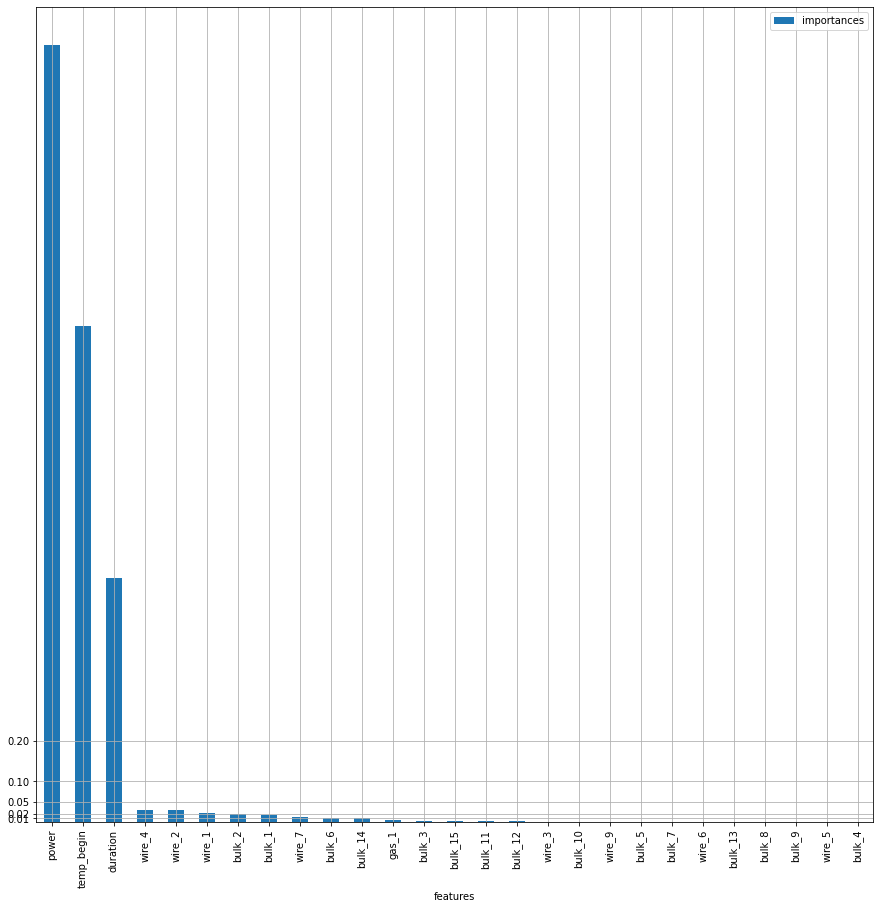

In [112]:
ax = df_importances.sort_values(by='importances', ascending=False).plot(x='features', y='importances', kind='bar', figsize=(15, 15))
plt.grid()
grid_points = [.01, .02, .05, .1, .2]
ax.yaxis.set_ticks(grid_points)
plt.show()

<font color='DarkBlue'>
📌 Заметны 3 наиболее значимых признака: активная мощность, начальная температура и длительность времени между первым и последним замерами температуры <br>
📌 Также можно выделить несколько менее важных, установив порог в 0.01 единицу <br> 
</font>

In [113]:
df_importances[df_importances['importances'] > 0.01]['features']

0       duration
1     temp_begin
2          power
4         bulk_1
5         bulk_2
9         bulk_6
19        wire_1
20        wire_2
22        wire_4
25        wire_7
Name: features, dtype: object

<font color='DarkBlue'>
📌 Далее необходимо изменить исходные выборки, оставив только наиболее важные в текущем контесте признаки. В дальнейшем возможно наиболее активное использование примесей, параметры которых не попали в текущий список, поэтому состав признаков в зависимости от технологии и других внешних факторов может меняться <br>
</font>

In [114]:
columns = list(df_importances[df_importances['importances'] > 0.01]['features'])
columns.append('temp_end')
df = df[columns]
df_final_test = df_final_test[df_importances[df_importances['importances'] > 0.01]['features']]
df_features_train, df_features_test = train_test_split(df.drop('temp_end', axis=1), test_size=0.25, random_state=3102022)
df_features_final_test = df_final_test.copy()
del columns
print('Размер df_features_train:', df_features_train.shape)
print('Размер df_features_test:', df_features_test.shape)
print('Размер df_features_final_test:', df_features_final_test.shape)

Размер df_features_train: (1743, 10)
Размер df_features_test: (581, 10)
Размер df_features_final_test: (692, 10)


<font color='DarkBlue'>
📌 Теперь можно проанализировать параметры наиболее важных признаков <br>
</font>

In [115]:
print('-----Обучающая выборка-----')
display(df_features_train.describe())
print('-----Тестовая выборка-----')
display(df_features_test.describe())

-----Обучающая выборка-----


,duration,temp_begin,power,bulk_1,bulk_2,bulk_6,wire_1,wire_2,wire_4,wire_7
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,1921.711426,1587.364868,3.176899,3.457831,1.337349,22.728629,102.618996,17.726206,0.352731,0.008365
std,1435.603638,23.816582,1.457728,12.646584,18.670840,56.212451,43.734200,33.980957,5.232783,0.237700
min,234.000000,1519.000000,0.186226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1223.000000,1571.000000,2.192191,0.000000,0.000000,0.000000,73.733398,0.000000,0.000000,0.000000
50%,1629.000000,1587.000000,3.042044,0.000000,0.000000,0.000000,102.117607,0.000000,0.000000,0.000000
75%,2297.500000,1603.000000,3.930118,0.000000,0.000000,0.000000,129.029152,22.620001,0.000000,0.000000
max,23537.000000,1660.000000,17.496496,185.000000,325.000000,503.000000,280.987213,282.780151,113.231041,8.490040


-----Тестовая выборка-----


,duration,temp_begin,power,bulk_1,bulk_2,bulk_6,wire_1,wire_2,wire_4,wire_7
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,1831.664429,1587.380371,3.087584,3.366609,1.690189,21.492255,101.838623,17.274231,0.170644,0.000403
std,903.870972,23.071514,1.322296,11.743150,20.357250,54.550470,42.988113,32.655830,2.930973,0.009717
min,324.000000,1520.000000,0.375838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1200.000000,1571.000000,2.158948,0.000000,0.000000,0.000000,72.159355,0.000000,0.000000,0.000000
50%,1657.000000,1586.000000,2.970197,0.000000,0.000000,0.000000,100.070877,0.000000,0.000000,0.000000
75%,2278.000000,1602.000000,3.897216,0.000000,0.000000,0.000000,125.099525,24.972479,0.000000,0.000000
max,7506.000000,1660.000000,7.124832,92.000000,270.000000,325.000000,330.314423,220.348953,56.078880,0.234208


<font color='DarkBlue'>
📌 Заметно, что разброс значений как целевого признака, так и основных параметров технологического процесса 'power', 'temp_begin' и 'duration'на тестовой выборке ниже, соответственно, модель может давать более точные предсказания на ней <br>
📌 Для качественного использования выбранного алгоритма необходимо заново осуществить масштабирование признаков <br> 
</font>

In [116]:
numeric = df_features_train.select_dtypes(include=['uint8', 'uint16', 'float32']).columns
scaler = StandardScaler()
scaler.fit(df_features_train[numeric]) 
df_features_train[numeric] = scaler.transform(df_features_train[numeric])
df_features_test[numeric] = scaler.transform(df_features_test[numeric])
df_features_final_test[numeric] = scaler.transform(df_features_final_test[numeric])

Усредненная по CV лучшая метрика MAE: 5.696239735710746
Усредненная по CV метрика RMSE модели: 7.5253915346290485
Усредненная по CV метрика R2 модели: 0.5579653480623394
Время обучения: 4 ms
Время предсказания: 3 ms
Среднее значение предсказания: 1593.2666343668302
Метрика R2 на тестовой выборке: 0.5475767804640161


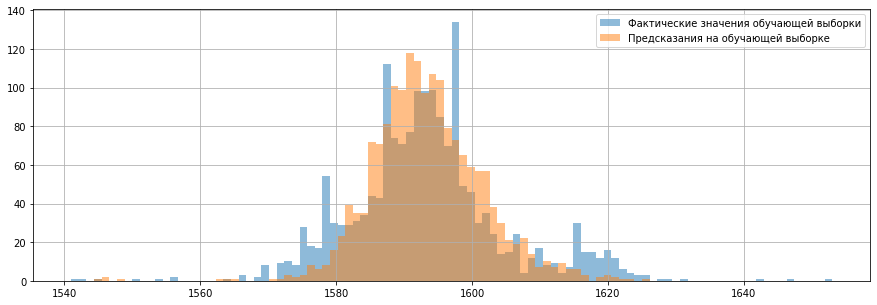

Метрика MAE на тестовой выборке: 5.430531134366494
Метрика RMSE на тестовой выборке: 7.244411262841216


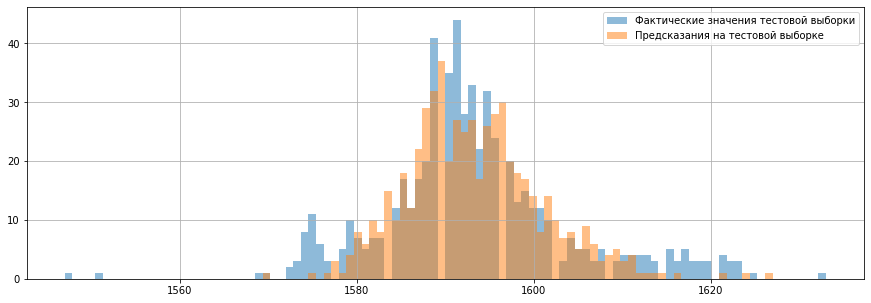

CPU times: user 1.63 s, sys: 802 ms, total: 2.43 s
Wall time: 2.36 s


In [117]:
%%time
model = Lasso(alpha=0.1, random_state=3102022)
fit_predict(model, False, 5)
print('Метрика MAE на тестовой выборке:', mean_absolute_error(df_target_test, df_predicted_test))
print('Метрика RMSE на тестовой выборке:', mean_squared_error(df_target_test, df_predicted_test) ** 0.5)
pd.Series(df_target_test).hist(bins=np.linspace(df_target_test.min(), df_target_test.max(), num=101), label='Фактические значения тестовой выборки', alpha=0.5, figsize = (15,5))
pd.Series(df_predicted_test).hist(bins=np.linspace(df_target_test.min(), df_target_test.max(), num=101), label='Предсказания на тестовой выборке', alpha=0.5, figsize = (15,5))
plt.legend()
plt.show() 

<font color='DarkBlue'> 
📌 На основе предоставленной информации определены следующие выводы:  

- значения метрик на обучающей выборке с учетом кроссвалидации незначительно хуже, чем при использовании выборки со всеми параметрами, но время обучения и предсказания заметно меньше;
- все метрики также имеют удовлетворительные условию задачи значения; 
- распределение предсказаний соответствует фактическому, заметны отсутствующие значения в определенных диапазонах фактических значений целевого признака тестовой выборки согласно обозначенной особенности исходного датасета;
- значения метрик тестовой выборки лучше, чем обучающей, факт может быть обоснован исходя из ранее выделенного анализа основных статистик признаков в указанных сериях (отклонения параметров тестовой выборки меньше)

📌 Можно определить целевой признак на сформированной тестовой выборке с изначально отсутствующими значениями <br> 
</font>     

In [119]:
df_predicted_final_test = model.predict(df_features_final_test)
df_test_predict = pd.concat((df_key_value, pd.Series(df_predicted_final_test)), axis=1, join='inner') 
df_test_predict = df_test_predict.rename(columns={0:'temp_end'})
df_test_predict = df_test_predict.set_index('key')
df_test_predict

,temp_end
key,
2500,1583.145486
2501,1591.992802
2502,1581.823238
2503,1592.909138
2504,1594.569264
...,...
3237,1594.267270
3238,1589.724241
3239,1603.271530


<font color='DarkBlue'> 
📌 Заявленные операции выполняются достаточно быстро, получена таблица с соответствиями идентификатора партии целевому признаку - конечному замеру температуры стали <br> 

📌 На основании произведенных исследований можно сформировать следующие выводы:
    
- предоставленные данные относительно хорошего качества, заголовки не представлены в общепринятом в среде аналитиков формате, не содержатся дубликаты, присутствует достаточно большое количество пропусков во многих полях и редкие аномальные значения. Присутсвуют как технические ошибки в корректности данных, например, низкая температура замера, не соответствующая технологии (возможно причиной является неисправность прибора), и их отсутствии, например, значений температуры по некоторым замерам, так и связанные с явлением человеческого фактора, например, аномальные значения мощности нагрева электродами или отсутствие данных по замерам температуры, занесенным в базу в качестве единственной записи, а также провалы в диапазоне временного интервала расположения значений целевого признака;
- также присутствует много лишних данных, например, касательно времени добавления примесей или времени нагрева электродами. Последний параметр имеет сильную корреляцию со значениями мощности. Также удалены параметры, имеющие малое влияние на определение прдсказаний целевого признака;    
- для более удобного использования данных в исходных таблицах необходимо преобразование типов данных в форматы, занимающие меньший объем памяти и временные, и заполнение пропусков некоторых столбцов стандартизованными значениями;
- определено, что наилучшим алгоритмом обучения модели для определения температуры стали по конечным замерам каждой партии будет являться метод Lasso полиномиальной регрессии в соответствии с указанными выше обоснованиями, построена модель и выполнены предсказания на отсутствующих данных в исходной выборке и тестовой, для которой определены основные метрики. Наиболее важные критерии, послужившие основой для выбора модели: качество предсказания, время обучения и предсказания модели;
- значение ключевой метрики MAE согласно анализу предсказаний определения температуры стали на исходной выборке данных менее 6
</font> 

## Общий отчет

<font color='DarkBlue'> 
📌 <b> Решаемая задача </b>    
    
Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. На текущем этапе требуется построить модель, которая предскажет температуру стали
    
📌 <b> Краткое описание технологического процесса </b>  
    
Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»)

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»)
    
📌 <b> Описание решения </b>      
    
1. Проведен исследовательский анализ данных:
- загружены данные достаточно хорошего качества и получена первичная информация об их содержании;
- проанализировано распределение исходных данных и порядок событий в производственном процессе; 
- изменены типы данных, содержащих временные признаки;
- удалены партии с аномальными значениями признаков: отрицательной мощностью нагрева электродами, низкой температурой сырья на любой стадии технологического процесса; 
- удалены данные, имеющие отсутствующие значения температуры при замере и единственную запись по причине невозможности определения временного интервала;
- пропущенные значения остальных признаков заменены на уникальные или нулевые, чтобы следующие модели разграничивали подобные показатели    
2. Сгенерированы выборки, на которых будут обучаться модели в процессе отбора наилучшей:
- агрегированы сырые данные из исходных таблиц: общее время нагрева электродами, суммарная активная и реактивная мощности, интервал времени между первым и последним замерами, температура на указанных итерациях измерений;
- исключены менее значимые из сильно коррелируемых с другими параметры: время нагрева электродами, реактивная мощность, объемы пары присадок; 
- удалены данные из объединенной из исходных таблицы, не имеющие влияния на целевой признак и не несущие полезной информации для обучения моделей: идентификатор партии и время добавления присадок;
- выборки разбиты на обучающую и тестовую, выделен целевой признак;
- типы данных преобразованы в форматы, занимающие меньший объем памяти      
3. Построены модели, которые предсказывают температуру стали и выбрана оптимальная:    
- выбрано несколько моделей и проверена их эффективность методом кроссвалидации на обучающей выборке с использованием выделенных в отдельную таблицу ключевого для текущей задачи показателя эффективности MAE, а также основных метрик RMSE, R2, времени обучения и предсказания;
- при необходимости для моделей, обучаемых алгоритмами полиномиальной регресии, выполнено масштабирование признаков;     
- проведен анализ значимости признаков на наилучшей модели, полученной с использованием метода Lasso алгоритма полиномиальной регрессии и удалены наименее важные признаки;
- эффективность выбранной модели проверена на тестовой выборке путем выявления значений основных метрик;
- дополнительно найдены значения предсказаний для каждой партии выборки, изначально имеющей отсутстующие данные по температуре на конечном замере
    
📌 <b> Результат решения </b>     
 
Модели полиномиальной регрессии достаточно хороши и имеют малое значение времени обучения и предсказания, чем определяется удобство пользования моделями и значительно облегчает также реализацию процесса переобучения модели, гистограммы фактических значений и предсказаний наиболее точно соответствуют на общем интервале значений, среднее значение целевого признака точно соотносится с предсказанным. Среди этих моделей наиболее удобной является обученная с использованием метода Lasso с гиперпараметром alpha, равным 0.1, отличающаяся лучшими значениями метрик, полученными на обучающей выборке с использованием метода кроссвалидации.        
</font> 

In [90]:
print('Среднее значение целевого признака на тестовой выборке:', df_target_test.mean())
final_table

Среднее значение целевого признака на тестовой выборке: 1593.2548


,name,mae_train,rmse_train,r2_train,r2_test,mean,t_train,t_predict
0,LinearRegression,5.671472,7.539363,0.556800,0.547135,1593.259099,95,4
1,Ridge,5.671442,7.539266,0.556808,0.547126,1593.259152,4,2
2,Lasso,5.668313,7.511652,0.559910,0.548257,1593.249017,94,3
3,RandomForestRegressor,5.862632,8.132223,0.485738,0.525017,1593.525353,13889,321
4,CatBoostRegressor,5.567338,7.948886,0.509703,0.550012,1592.909437,6058,3


<font color='DarkBlue'> 
Построена модель и выполнены предсказания на отсутствующих данных в исходной выборке и тестовой, для которой определены основные метрики качества. Наиболее важные критерии, послужившие основой для выбора модели: качество предсказания, время обучения и предсказания модели. Значение ключевой метрики MAE согласно анализу предсказаний определения температуры стали на сконфигурированных обучающей и тестовой выборках менее 6 - 5.696 и 5.431 соответственно. <br>
    
📌 <b> Факторы модели </b> 
    
Ниже представлен график важности всех параметров в подготовленной для использования в алгоритмах обучения выборке    
</font> 

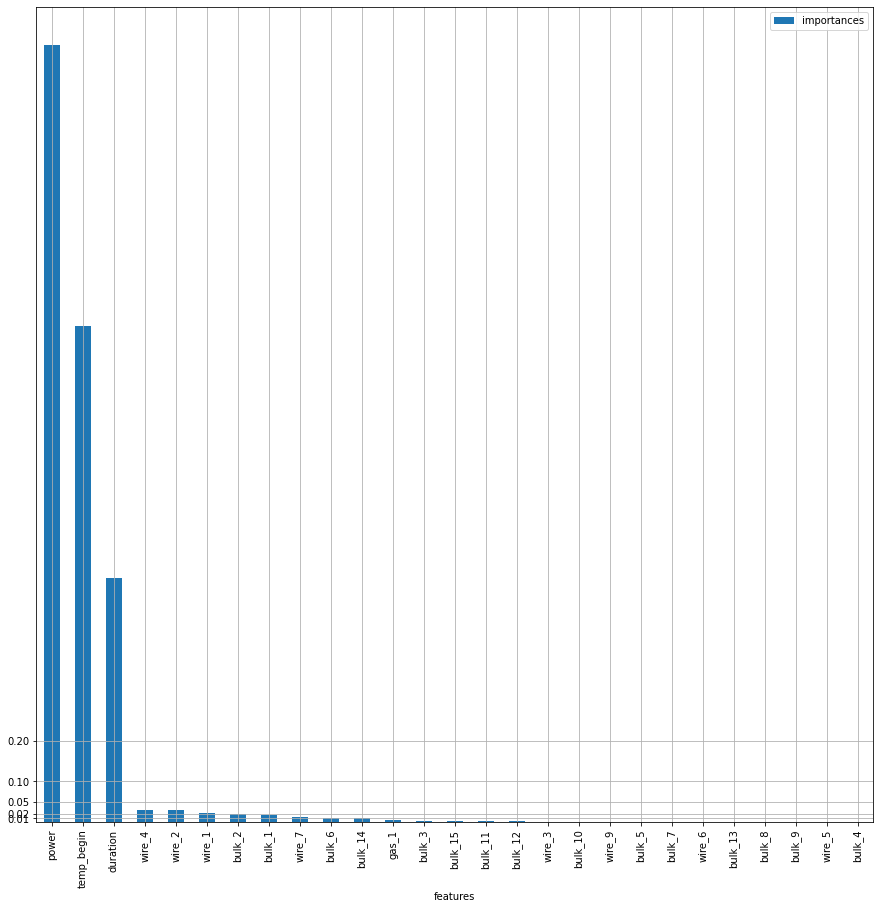

In [112]:
ax = df_importances.sort_values(by='importances', ascending=False).plot(x='features', y='importances', kind='bar', figsize=(15, 15))
plt.grid()
grid_points = [.01, .02, .05, .1, .2]
ax.yaxis.set_ticks(grid_points)
plt.show()

<font color='DarkBlue'> 
<b> Ответы на вопросы зафиксированные в ноушене </b>
    
- Какие пункты плана были выполнены, а какие — нет (поясните почему)? <br>
- Все пункты выполнены в соответствии с указанным выше планом, но модели были обучены не всеми алгоритмами, которые предполагалось использовать, например, LGBMRegressor - по причине очень долгого обучения моделей на сетке гиперпараметров, а также учитывая, что не были выделены только самые значимые признаки из исходных <br>
<br>    
- Какие трудности возникли и как вы их преодолели? <br>
- Трудности заключались в следующем (большинство вопросов снялись после консультации): необходимость понимания технологического процесса (факт, что температура плавления стали 1400 градусов, соответственно, значения, не превышающие указанный порог, аномальные) и наличие знаний из области электротехники (нахождение общей мощности и выполненной работы); необходимо было предварительно обучать модели с выделенными признаками для нахождения их наилучшей комбинации; выбор метода проверки на мультиколлинеарность; понимание того, какой признак будет являться целевым и какая выборка тестовой в текущей задаче; в выявлении правильного алгоритма решения задачи: выбора верного момента проверки значимости признаков, а также выполнения предсказания на тестовой выборке <br>
<br>    
- Какие ключевые шаги в решении задачи выделили? <br>
- Ключевые шаги для решения заачи указаны выше в разделе 'Описание решения': предобработка данных, выделение обучающей и тестовой выборок, обучение моделей, выбор наилучшей, получение результатов на тестовой выборке. Одним из основных факторов создания успешной модели является проверка признаков на мультиколлинеарность и удаление наименее значимых из коррелируемых (выбор осуществляется экспериментальным методом или логически в соответствии с технологией исследуемого процесса) <br>
<br>    
- Какая ваша итоговая модель и какое у неё качество? <br>
- Итоговой моделью является обученная методом Lasso алгоритма полиномиальной регрессии, качество согласно ключевой метрики MAE на сконфигурированных обучающей и тестовой выборках менее 6 - 5.696 и 5.431 соответственно, также модель адекватна, не переобучена, гистограмма предсказаний соответствует действительности, скорость выполнения операций обучения и предсказания очень высокая <br>
</font>       